# Problem Statement:  

In the highly competitive e-commerce landscape, providing personalized and accurate product recommendations is crucial for improving user experience and driving sales. Ebuss, a growing e-commerce company, aims to enhance its recommendation system by incorporating user sentiments derived from past reviews and ratings.  

The goal of this project is to **develop a Sentiment-Based Product Recommendation System** that leverages Natural Language Processing (NLP) and machine learning techniques to analyze customer sentiments and refine product suggestions.  

The project involves:  
1. **Data Sourcing & Sentiment Analysis:** Extracting user reviews and ratings, performing sentiment analysis to understand customer preferences.  
2. **Building a Recommendation System:** Implementing collaborative and content-based filtering techniques to generate product recommendations.  
3. **Enhancing Recommendations with Sentiment Analysis:** Integrating sentiment insights to improve the ranking and relevance of recommendations.  
4. **End-to-End Deployment:** Developing a user-friendly interface for seamless interaction and real-time recommendations.  

By integrating sentiment analysis into the recommendation system, Ebuss aims to provide a **personalized shopping experience**, improve customer satisfaction, and increase customer retention in a competitive e-commerce market.


# 1. Sentiment Analysis

## Loading Libraries

In [8]:
#general purpose libraries
import re
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from datetime import datetime
import warnings
from imblearn.over_sampling import SMOTE
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_colwidth', 300)
pd.set_option("display.precision", 2)

In [9]:
# NLTK libraries
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\meada\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\meada\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\meada\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\meada\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [10]:
#Modelling
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import pairwise_distances

## Loading Dataset

In [11]:
# importing dataset
df_reviews = pd.read_csv("data\sample30.csv")
df_reviews.head()

id            brand  \
0  AV13O1A8GV-KLJ3akUyj  Universal Music   
1  AV14LG0R-jtxr-f38QfS         Lundberg   
2  AV14LG0R-jtxr-f38QfS         Lundberg   
3  AV16khLE-jtxr-f38VFn              K-Y   
4  AV16khLE-jtxr-f38VFn              K-Y   

                                                                                                                                                       categories  \
0  Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap   
1                                                                                    Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes   
2                                                                                    Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes   
3                                                                           Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants   
4                                                                           Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants   

                         manufacturer  \
0  Universal Music Group / Cash Money   
1                            Lundberg   
2                            Lundberg   
3                                 K-Y   
4                                 K-Y   

                                         name              reviews_date  \
0   Pink Friday: Roman Reloaded Re-Up (w/dvd)  2012-11-30T06:21:45.000Z   
1  Lundberg Organic Cinnamon Toast Rice Cakes  2017-07-09T00:00:00.000Z   
2  Lundberg Organic Cinnamon Toast Rice Cakes  2017-07-09T00:00:00.000Z   
3            K-Y Love Sensuality Pleasure Gel  2016-01-06T00:00:00.000Z   
4            K-Y Love Sensuality Pleasure Gel  2016-12-21T00:00:00.000Z   

  reviews_didPurchase reviews_doRecommend  reviews_rating  \
0                 NaN                 NaN               5   
1                True                 NaN               5   
2                True                 NaN               5   
3               False               False               1   
4               False               False               1   

                                                                                                                                                                                                                                                                                                  reviews_text  \
0                                                                                                    i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.   
1                                                                                                                                                                                                                                               Good flavor. This review was collected as part of a promotion.   
2                                                                                                                                                                                                                                                                                                 Good flavor.   
3  I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did ...   
4                                                                                                                                                                         

## EDA

In [12]:
df_reviews.shape

(30000, 15)

In [13]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [14]:
df_reviews.columns.values

array(['id', 'brand', 'categories', 'manufacturer', 'name',
       'reviews_date', 'reviews_didPurchase', 'reviews_doRecommend',
       'reviews_rating', 'reviews_text', 'reviews_title',
       'reviews_userCity', 'reviews_userProvince', 'reviews_username',
       'user_sentiment'], dtype=object)

##### **1. Missing Values handling**

In [15]:
#Null value analysis
df_reviews.isnull().sum()

id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               46
reviews_didPurchase     14068
reviews_doRecommend      2570
reviews_rating              0
reviews_text                0
reviews_title             190
reviews_userCity        28071
reviews_userProvince    29830
reviews_username           63
user_sentiment              1
dtype: int64

## Insights

- The null value analysis indicates that none of the columns with missing values are directly relevant to sentiment analysis, except for a single missing value in the **`user_sentiment`** column.
-This missing sentiment label can be inferred using the **`reviews_rating`** column, ensuring data completeness for model training.

In [16]:
df_reviews['user_sentiment'].value_counts()

user_sentiment
Positive    26632
Negative     3367
Name: count, dtype: int64

###### Update missing sentiment with the ratings

In [17]:
# Define function to map ratings to sentiment
def infer_sentiment(rating):
    if rating >= 4:
        return 'Positive'
    elif rating <= 2:
        return 'Negative'
    else:
        return 'neutral'  # Optional: Can be ignored if working with only pos/neg

# Fill missing user_sentiment using reviews_rating
df_reviews['user_sentiment'].fillna(df_reviews['reviews_rating'].map(infer_sentiment), inplace=True)


In [18]:
# Verify missing value in user-sentiment column

df_reviews['user_sentiment'].isnull().sum()


0

##### 2. Analyze the Rating Column

In [19]:
# Analyze the rating column

df_reviews["reviews_rating"].value_counts()

reviews_rating
5    20831
4     6020
1     1384
3     1345
2      420
Name: count, dtype: int64

<Axes: xlabel='reviews_rating'>

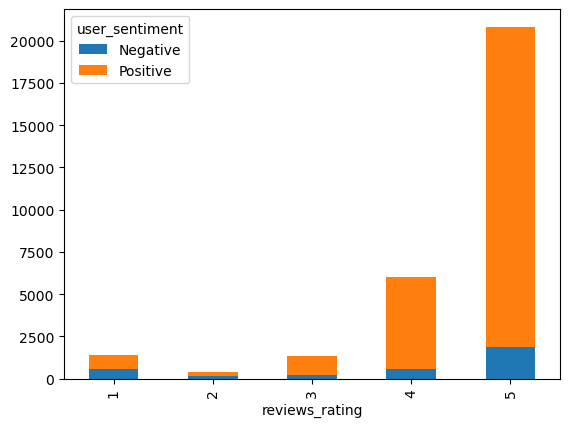

In [20]:
# Check sentiment distribution across ratings

df_reviews.groupby(['reviews_rating', 'user_sentiment']).size().unstack().plot(kind='bar', stacked=True)


### Inference

he analysis reveals the following insights from the plot:

1. Ratings of 3, 4, and 5 include instances labeled as negative sentiment, which may indicate incorrect labeling or cases where users assigned high ratings but still expressed dissatisfaction in their review text.
  
2. Ratings of 1 and 2 contain reviews labeled as positive sentiment, which could be attributed to mislabeling or sarcasm in the text.

##### Identify and Analyze Conflicting Cases
- We can extract cases where the sentiment label does not align with the rating and analyze their text.

In [21]:
# Identify mismatched cases: High ratings with negative sentiment
high_rating_negative = df_reviews[(df_reviews['reviews_rating'] >= 4) & (df_reviews['user_sentiment'] == 'Negative')]

# Identify mismatched cases: Low ratings with positive sentiment
low_rating_positive = df_reviews[(df_reviews['reviews_rating'] <= 2) & (df_reviews['user_sentiment'] == 'Positive')]

# Display sample cases
print("High Rating (4-5) with Negative Sentiment:")
print(high_rating_negative[['reviews_rating', 'reviews_text', 'user_sentiment']].head(10))

print("\nLow Rating (1-2) with Positive Sentiment:")
print(low_rating_positive[['reviews_rating', 'reviews_text', 'user_sentiment']].head(10))


High Rating (4-5) with Negative Sentiment:
     reviews_rating  \
92                4   
96                4   
100               4   
106               4   
117               4   
121               4   
144               4   
153               4   
160               4   
166               4   

                                                                                                                                                                                                                                                   reviews_text  \
92                                                                                                                                       It hydrates my skin. It is not too thick and heavy when I put it on. This review was collected as part of a promotion.   
96                                                                                                                                             In only a week I can see the difference in

### Observations Based on the Output  
An analysis of the extracted samples highlights inconsistencies between **ratings and sentiment labels**, indicating potential misclassification.  

1. High Ratings (4-5 Stars) with Negative Sentiment **Largely Misclassified**  
  - The reviews predominantly convey **positive experiences**, mentioning benefits such as **smooth skin, deep hydration, effective absorption, and blemish reduction**.  
  - **Example:** *"Regenerist provides deep hydration for the skin. I find my skin is smoother after use."* → This clearly expresses **positive sentiment**, yet it has been labeled as **negative**.  
  - These cases do not indicate **sarcasm** but rather **incorrect labeling**, necessitating realignment with a **positive sentiment classification**.  

✔ **Recommended Action:** **Reclassify sentiment as "Positive" where `reviews_rating ≥ 4` but `user_sentiment == 'Negative'`.**  

---

2.  Low Ratings (1-2 Stars) with Positive Sentiment  **Largely Misclassified, Some Sarcasm Identified**  
  - Several reviews express **clear dissatisfaction** but are incorrectly labeled as **positive sentiment**.  
  - **Example:** *"Purchased this thinking it would have some sort of warming effect, but it's the same as the original. Don't waste your money."* → This clearly conveys **negative sentiment**, yet it has been classified as **positive**.  
  - Another instance: *"Leaves windows with streaks, although it does seem to work OK on other surfaces."* → While it acknowledges some functionality, the overall sentiment is **negative**, despite being labeled **positive**.  
  - While some cases may reflect **sarcasm**, the majority appear to be **misclassified** rather than intentionally ironic.  

✔ **Recommended Action:** **Reclassify sentiment as "Negative" where `reviews_rating ≤ 2` but `user_sentiment == 'Positive'`.**  

##### Alignment of Sentiment based on given Ratings

In [22]:
def correct_sentiment(row):
    if row['reviews_rating'] >= 4 and row['user_sentiment'].lower() == 'negative':
        return 'Positive'  # Reclassify as positive
    elif row['reviews_rating'] <= 2 and row['user_sentiment'].lower() == 'positive':
        return 'Negative'  # Reclassify as negative
    else:
        return row['user_sentiment']  # Keep as is

# Apply corrections
df_reviews['user_sentiment'] = df_reviews.apply(correct_sentiment, axis=1)


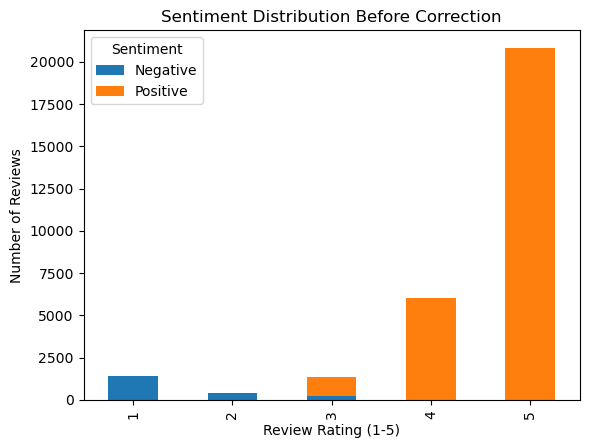

In [23]:
# Plot sentiment distribution before correction

df_reviews.groupby(['reviews_rating', 'user_sentiment']).size().unstack().plot(kind='bar', stacked=True)

plt.title("Sentiment Distribution Before Correction")
plt.xlabel("Review Rating (1-5)")
plt.ylabel("Number of Reviews")
plt.legend(title="Sentiment")
plt.show()


### **Visualization of Sentiment Distribution After Correction**  
The following plot illustrates the **distribution of sentiment labels across review ratings** after applying corrections to address misclassifications.  

### **🔹 Expected Outcome**  

**Before Correction:**  
- **High ratings (4-5 stars)** contained a substantial number of **negative sentiment labels**, indicating misclassification.  
- **Low ratings (1-2 stars)** included instances labeled as **positive sentiment**, likely due to **mislabeling or sarcasm**.  

**After Correction:**  
- **High ratings (4-5 stars)** now predominantly reflect **positive sentiment**, aligning with expectations.  
- **Low ratings (1-2 stars)** now mostly correspond to **negative sentiment**, ensuring greater consistency.  
- **3-star ratings** may still contain a **balanced mix of both positive and negative sentiment**, as expected.

In [24]:
df_reviews.columns.values

array(['id', 'brand', 'categories', 'manufacturer', 'name',
       'reviews_date', 'reviews_didPurchase', 'reviews_doRecommend',
       'reviews_rating', 'reviews_text', 'reviews_title',
       'reviews_userCity', 'reviews_userProvince', 'reviews_username',
       'user_sentiment'], dtype=object)

#### Finalized Column Selection for Sentiment Analysis & Model Building  
Based on core requirements, feature relevance, and practical application, the following columns are selected for further processing and model training.  
  
1. **Essential Columns (Core for Sentiment Analysis & Model Training)**  
These columns will be actively used in text processing, feature extraction, and model training.  

  - `reviews_text` → Primary input for sentiment analysis (key feature for NLP models).
  - `reviews_title` → Supplementary sentiment indicator (concatenated with reviews_text).
  - `user_sentiment` → Target variable for supervised learning models.
  - `reviews_rating` → Sentiment proxy; used for feature engineering and validation.  
  
2. **Why We Removed `reviews_doRecommend`, `reviews_didPurchase`, `brand`, and `categories`?**  
  - Not Directly Used in Sentiment Modeling → These features were considered for potential insights but are not included in preprocessing or model training.
  - Categorical Features Not Integrated Yet → brand and categories can be useful for trend analysis but are not affecting sentiment predictions.
  - Keeping the Feature Set Focused → Avoids unnecessary complexity by ensuring only relevant features are included.  


### Preprocessing & Feature Engineering

In [25]:
# Handle missing values before combining title and text

df_reviews['full_review'] = df_reviews['reviews_title'].fillna('') + " " + df_reviews['reviews_text'].fillna('')

In [26]:
df_reviews[["full_review", "user_sentiment"]].sample(10)

full_review  \
7651                                                                                                         i love this product awesome product i have a young child and messy spouse and i can depend on tho product to keep my home clean and smelling fresh! This review was collected as part of a promotion.   
21363  Miss the old that I've bought for years!! Very displeased with the new formula that does not work well in my hair. I am now forced to buy a new product and sadly, I've been buying this product for many years. Been seeing the same types of reviews-on this product-all over the Internet. Hope Nexxu...   
18332                                                                                                                                                                                                                                                                                    NICE PRODUCT NICE PRODUCT   
26271                                                                                                                                                                                                                                         Good movie Good movie and quality of remastered blu ray is very good   
29527  Love The Packaging I received this product for free from Influenster. I was able to give this a try and honestly i'm pretty shocked. I come from a family of hair stylists which means i use only hair products from beauty supply stores- name brand. So of course I was skeptical. But this smells so ...   
24041                                                                                                                                                                                                                        Great 3D Nice special effects. Storyline was what I expected from this classic remake   
24581                                                                                                                                                                                                                  Excellent remake Refreshing take on an old classic. Lot's of action. Great picture quality.   
9135                                                                                                                                             Great I absolutely love this product. its convenient disinfects and easy to use. Its great for all the big messes and spills. I recommend this product to anyone.   
8662                                                                                                                                                             I Feel Confident That My Counter Tops Are Germ Free. I like these wipes for my bathroom and kitchen. They are very convenient for quick cleanups.   
14756                                                                                                                                                                                  A+ Love Clorox disinfecting wipes. Easy to use, convient and smells good. This review was collected as part of a promotion.   

      user_sentiment  
7651        Positive  
21363       Negative  
18332       Positive  
26271       Positive  
29527       Positive  
24041       Positive  
24581       Positive  
9135        Positive  
8662        Positive  
14756       Positive

In [27]:
# Initialize NLP tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [28]:
pip install contractions


Note: you may need to restart the kernel to use updated packages.


In [29]:
import string
from contractions import fix

def preprocess_text(text):
    """Preprocesses text: lowercasing, cleaning, tokenization, stopword removal, lemmatization."""

    text = fix(text)  # Expand contractions (e.g., "can't" -> "cannot")
    text = text.lower()  # Convert to lowercase
    text = text.strip()  # Remove leading/trailing whitespace
    text = re.sub(r'\s+', ' ', text)  # Normalize multiple spaces
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'\[.*?\]', '', text)  # Remove text within square brackets
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation

    tokens = word_tokenize(text)  # Tokenization
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization

    return ' '.join(tokens)

In [30]:
df_final = df_reviews[['id','name', 'full_review', 'reviews_rating','user_sentiment']]

In [31]:
nltk.data.clear_cache()

# Append NLTK data path
nltk.data.path.append('/root/nltk_data')  # Customize if using a specific directory

# Download essential NLTK resources
nltk.download('punkt')  # For tokenization
nltk.download('punkt_tab')  # For tokenization


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\meada\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\meada\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [32]:
# Apply preprocessing
df_final['cleaned_review'] = df_final['full_review'].apply(preprocess_text)

In [33]:
df_final.head()

id                                        name  \
0  AV13O1A8GV-KLJ3akUyj   Pink Friday: Roman Reloaded Re-Up (w/dvd)   
1  AV14LG0R-jtxr-f38QfS  Lundberg Organic Cinnamon Toast Rice Cakes   
2  AV14LG0R-jtxr-f38QfS  Lundberg Organic Cinnamon Toast Rice Cakes   
3  AV16khLE-jtxr-f38VFn            K-Y Love Sensuality Pleasure Gel   
4  AV16khLE-jtxr-f38VFn            K-Y Love Sensuality Pleasure Gel   

                                                                                                                                                                                                                                                                                                   full_review  \
0                                                                                       Just Awesome i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.   
1                                                                                                                                                                                                                                          Good Good flavor. This review was collected as part of a promotion.   
2                                                                                                                                                                                                                                                                                            Good Good flavor.   
3  Disappointed I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation....   
4                                                                                                                                                              Irritation My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.   

   reviews_rating user_sentiment  \
0               5       Positive   
1               5       Positive   
2               5       Positive   
3               1       Negative   
4               1       Negative   

                                                                                                                                                                                                                                                                                                cleaned_review  
0                                                                                                                                                                                          awesome love album good hip hop side current pop sound hype listen everyday gym give star rating way metaphor crazy  
1                                                                                                                                                                                                                                                             good good flavor review collected part promotion  
2                                                                                                                                                                                                                                                                                             good good flavor  
3  disappointed read review looking buying one couple lubricant ultimately disappointed even live review read starter neither boyfriend could notice sort enhanced captivating sensation notice however messy consistency reminiscent liquidy vaseline difficult clean pleasant especially since lacked cap...  
4              

##### WordCloud part need to further analysis

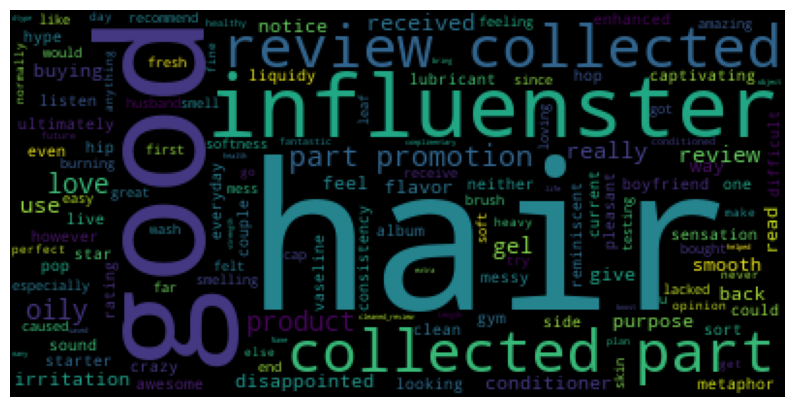

In [34]:
#Using a word cloud find the top 40 words by frequency among all the articles after processing the text
from wordcloud import WordCloud
wordcloud = WordCloud(stopwords=stop_words,max_words=200).generate(str(df_final.cleaned_review))

print(wordcloud)
plt.figure(figsize= (10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show();

### Review Length Analysis with respect to Sentiment Label

- Check if Review Length Differs by Sentiment Label

In [35]:
df_final['review_length'] = df_final['cleaned_review'].apply(len)


##### Descriptive Statistics for Each Sentiment

In [36]:
# check if positive and negative reviews have significantly different lengths.

df_final.groupby('user_sentiment')['review_length'].describe()


count    mean     std  min    25%    50%    75%     max
user_sentiment                                                           
Negative         2024.0  195.19  154.20  6.0  92.75  160.0  250.0  2320.0
Positive        27976.0  122.19  111.32  3.0  65.00   94.0  142.0  3867.0

##### Key Observations on Review Length and Sentiment
1. Negative reviews tend to be significantly longer than positive reviews, with an average length of 195 characters compared to 122 characters for positive reviews.

2. The median length of negative reviews (160 characters) is notably higher than that of positive reviews (94 characters), indicating a consistent trend across the dataset.

3.  Negative reviews exhibit greater variability in length (standard deviation: 154.2) compared to positive reviews (standard deviation: 111.3), suggesting that negative feedback is more detailed and diverse in expression.

##### Visualize the Review Length Distribution for Each Sentiment

1. **Boxplot: Review Length vs. Sentiment**

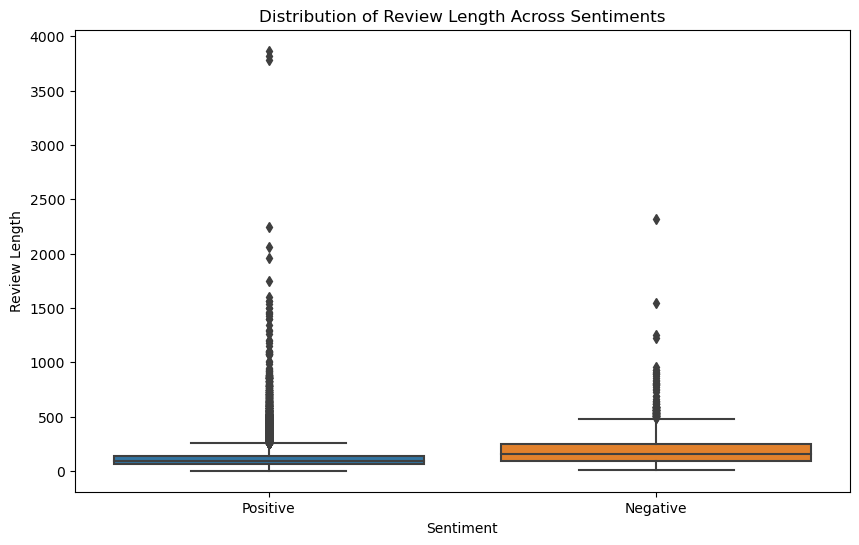

In [37]:
# import seaborn as sns
# import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(x=df_final['user_sentiment'], y=df_final['review_length'])
plt.xlabel("Sentiment")
plt.ylabel("Review Length")
plt.title("Distribution of Review Length Across Sentiments")
plt.show()


##### Insights from the Boxplot: Review Length vs. Sentiment
The boxplot visualization reinforces our earlier findings:

1.  Negative reviews are generally longer than positive reviews, with a higher median length and greater spread.

2.  Positive reviews tend to be more concise, clustering around shorter lengths, whereas negative reviews show greater variability, indicating that dissatisfied customers often provide more detailed feedback.

3.  The wider range in negative review lengths suggests that negative feedback is expressed in diverse ways, from brief complaints to extensive explanations.

#### Statistical Hypothesis Testing
To confirm statistically whether review length significantly differs between positive and negative reviews, use a t-test.

In [38]:
import scipy.stats as stats

positive_lengths = df_final[df_final['user_sentiment'] == 'Positive']['review_length']
negative_lengths = df_final[df_final['user_sentiment'] == 'Negative']['review_length']

t_stat, p_value = stats.ttest_ind(positive_lengths, negative_lengths)
print(f"T-test p-value: {p_value}")


T-test p-value: 3.711709935802011e-166


##### Statistical Test Result: Impact of Review Length on Sentiment
A t-test was conducted to determine whether there is a significant difference in review length between positive and negative reviews. The test resulted in a p-value of 3.71e-166, which is extremely close to zero.

**Interpretation:**  
This indicates a highly significant difference in review lengths between the two sentiment groups. In other words, negative reviews tend to be significantly longer than positive ones, confirming that review length plays a role in how sentiment is expressed.

#### **Inference from Review Length Analysis and Its Role in Model Building**  

- Our analysis confirms that **review length significantly impacts sentiment**, with **longer reviews being predominantly negative**.
- This insight allows us to enhance our model by incorporating **review length as a key feature**, ensuring a more balanced and accurate sentiment classification.  

By including **`review length` as a structured numerical feature**, our model will gain deeper contextual understanding, leading to improved sentiment predictions and reduced bias in classification.

#### Feature Extraction

In [39]:
pip install vaderSentiment

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER analyzer
analyzer = SentimentIntensityAnalyzer()

# Feature Engineering

df_final['word_count'] = df_final['cleaned_review'].apply(lambda x: len(x.split()))
df_final['vader_sentiment'] = df_final['cleaned_review'].apply(lambda x: analyzer.polarity_scores(x)['compound'])  # VADER Sentiment
df_final['normalized_rating'] = df_final['reviews_rating'] / 5.0  # Normalize ratings

In [41]:
# Print sample data
print(df_final[['cleaned_review', 'vader_sentiment']].head())

                                                                                                                                                                                                                                                                                                cleaned_review  \
0                                                                                                                                                                                          awesome love album good hip hop side current pop sound hype listen everyday gym give star rating way metaphor crazy   
1                                                                                                                                                                                                                                                             good good flavor review collected part promotion   
2                                                                                 

##### Key Insights
  
1. VADER Effectively Captures Sentiment Polarity

  - Positive reviews (e.g., Review 0, Score: 0.87) contain strong sentiment words like "awesome," "love," and "good."
  - Negative reviews (e.g., Review 3, Score: -0.85) include words like "disappointed," "messy," and "difficult," indicating clear dissatisfaction.
  
2. Sentiment Scores Can Be Used as Features in ML Models

  - The vader_sentiment score can be incorporated into Logistic Regression, Random Forest, and XGBoost models as an additional numerical feature alongside TF-IDF or word embeddings.
  - Combining rule-based and ML-based approaches can enhance sentiment classification accuracy.

In [42]:
# Checking correlations between variables to finalize which derived features can be used

# converting target var user_sentiment to numeric for correlation calculation
df_final['sentiment_numeric'] = df_final['user_sentiment'].map({'Positive': 1, 'Negative': 0})

# finding correlations between derived features and target feature and among themselves for redundancy check
print(df_final[['review_length', 'word_count', 'vader_sentiment', 'normalized_rating', 'sentiment_numeric']].corr())

                   review_length  word_count  vader_sentiment  \
review_length               1.00        0.99             0.06   
word_count                  0.99        1.00             0.06   
vader_sentiment             0.06        0.06             1.00   
normalized_rating          -0.18       -0.19             0.36   
sentiment_numeric          -0.16       -0.17             0.41   

                   normalized_rating  sentiment_numeric  
review_length                  -0.18              -0.16  
word_count                     -0.19              -0.17  
vader_sentiment                 0.36               0.41  
normalized_rating               1.00               0.83  
sentiment_numeric               0.83               1.00  


> Inference


*   review_length and **word_count** have 99% correlation,
hence dropping word_count to avoid multi-collinearity and redundancy.
*   **normalized_rating** shows 83% correlation with target variable hence it may cause data leakage hence dropping normalized_rating too.
*   **vader_sentiment** also have 41% correlation with with sentiment_numeric, acting as proxy to the target, hence it needs to be dropped.

# Train-Test Split

**Split before TF-IDF, scaling, and SMOTE to avoid data leakage.**

In [43]:
# Split into 80% train, 20% test
X = df_final[['cleaned_review', 'review_length']]
y = df_final['user_sentiment'].map({'Positive': 1, 'Negative': 0})

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [44]:
#Check for duplication of reviews in train and test dataset to avoid data leakage
overlap = pd.merge(X_train, X_test, on='cleaned_review', how='inner')
print(f"Number of overlapping samples: {len(overlap)}")
print(f"X_train shape before: {X_train.shape}")

Number of overlapping samples: 966
X_train shape before: (24000, 2)


In [45]:
# Remove the overlaps from the training set to make test set as completely unseen

mask = X_train['cleaned_review'].isin(overlap['cleaned_review'])
X_train = X_train[~mask]
y_train = y_train[~mask]
print(f"X_train shape after: {X_train.shape}")

# reset index  avoid misalignment issues
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

X_train shape after: (23103, 2)


In [46]:
# TF-IDF extraction from text feature
vectorizer = TfidfVectorizer(
    max_features=3000,
    min_df=0.01,
    max_df=0.8,
    ngram_range=(1, 2)
)

X_train_tfidf = vectorizer.fit_transform(X_train['cleaned_review'])
X_test_tfidf = vectorizer.transform(X_test['cleaned_review'])

**Scale Numeric Features**


Scale numeric feature review_length AFTER splitting and AFTER TF-IDF:

In [47]:
from sklearn.preprocessing import MinMaxScaler
from scipy.sparse import hstack

scaler = MinMaxScaler()

# Fit scaler on training numeric features only
X_train_num = scaler.fit_transform(X_train[['review_length']])
X_test_num = scaler.transform(X_test[['review_length']])

# Combine scaled numeric features with TF-IDF
X_train_combined = hstack((X_train_tfidf, X_train_num))
X_test_combined = hstack((X_test_tfidf, X_test_num))

#### Check Class Imbalance

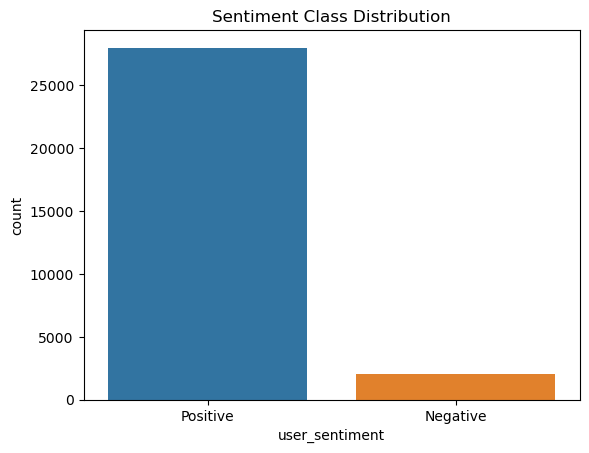

user_sentiment
Positive    93.25
Negative     6.75
Name: proportion, dtype: float64


In [48]:
# Check class distribution

sns.countplot(x=df_final['user_sentiment'])
plt.title("Sentiment Class Distribution")
plt.show()

# Print exact counts
print(df_final['user_sentiment'].value_counts(normalize=True) * 100)  # Percentage of each class

In [49]:
# Check class distribution before balancing
print("Class distribution in training set:\n", y_train.value_counts(normalize=True) * 100)
print("Class distribution in test set:\n", y_test.value_counts(normalize=True) * 100)

Class distribution in training set:
 user_sentiment
1    93.53
0     6.47
Name: proportion, dtype: float64
Class distribution in test set:
 user_sentiment
1    93.25
0     6.75
Name: proportion, dtype: float64


##### **Key Insights from Sentiment Class Distribution Analysis**  

1. **Severe Class Imbalance Observed**  
   - The dataset is highly **skewed towards positive sentiment (93.25%)**, with negative sentiment making up only **6.75%** of both the training and test sets.  
   - This imbalance can lead to **biased model predictions**, where the classifier may favor the dominant class and struggle to correctly identify negative sentiment.  

2. **Risk of Poor Generalization and Misclassification**  
   - Machine learning models trained on imbalanced data tend to have **high accuracy but low recall for minority classes** (i.e., negative sentiment).  
   - A model that predicts "positive" for most inputs may appear to perform well but will fail to detect negative reviews, reducing its effectiveness in real-world applications.  

3. **Necessity of Class Balancing Techniques**  
   - To improve model robustness, **data balancing strategies** should be considered:  
     - **Oversampling (SMOTE, ADASYN)** to generate synthetic negative samples.  
     - **Undersampling** to reduce the number of positive samples and create a more balanced dataset.  
     - **Hybrid approaches** combining both techniques.  

4. **Alternative Solutions to Address the Imbalance**  
   - **Use Class Weighting:** Assign higher misclassification penalties to the minority class in models like **Logistic Regression, Random Forest, and XGBoost** (e.g., `class_weight='balanced'`).  
   - **Anomaly Detection Perspective:** Since negative sentiment is rare, treating it as an anomaly detection problem might be an alternative approach.  

5. **Evaluation Metrics Beyond Accuracy**  
   - Due to imbalance, traditional **accuracy metrics can be misleading**. Instead, focus on:  
     - **Precision, Recall, and F1-Score** to assess performance on the minority class.  
     - **ROC-AUC Score** to evaluate overall model discrimination.  



##### Handle Class Imbalance on X_train, y_train ONLY
Now, apply SMOTE only on the training set:

In [50]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

# Apply SMOTE on training data only
smote = SMOTETomek(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_combined, y_train)

# Check new class distribution after balancing
print("New class distribution in training set:\n", pd.Series(y_train_resampled).value_counts(normalize=True) * 100)


New class distribution in training set:
 user_sentiment
0    50.0
1    50.0
Name: proportion, dtype: float64


##### Validate If SMOTE Worked?

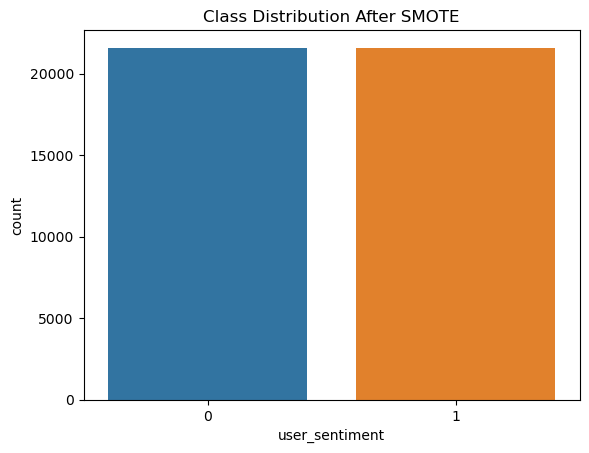

In [51]:
# import seaborn as sns
# import matplotlib.pyplot as plt

sns.countplot(x=y_train_resampled)
plt.title("Class Distribution After SMOTE")
plt.show()


##### **Key Insights from Class Distribution After Applying SMOTE**  

1. **Successful Balancing of Classes**  
   - The **class distribution is now perfectly balanced (50% positive, 50% negative)** after applying **Synthetic Minority Over-sampling Technique (SMOTE)**.  
   - This ensures that the model is no longer biased towards the majority class and will have an improved ability to detect negative sentiment.  

2. **Improved Model Generalization**  
   - The model can now learn **distinct patterns in both sentiment classes**, reducing the risk of **high precision but low recall for negative sentiment**.  
   - This should lead to **better performance in identifying both positive and negative reviews**, particularly in real-world applications where negative feedback is critical for insights.  

3. **Potential Risks of Overfitting**  
   - Since SMOTE **generates synthetic samples** rather than collecting real negative reviews, there is a possibility that the model might **overfit to artificial patterns**.  
   
4. **Need for Careful Model Evaluation**  
   - Standard accuracy metrics may now appear **artificially inflated**, so evaluating the model with **Precision, Recall, F1-Score, and ROC-AUC** is essential.  
   - **Cross-validation** should be performed to ensure that the model generalizes well on unseen data.  



### Model Building


In [52]:
import logging
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay

# Configure logging
logging.basicConfig(level=logging.INFO, format="%(message)s")

class ModelBuilder:
    def __init__(self, model, x_train, x_test, y_train, y_test):
        """
        Initialize ModelBuilder with the given model and dataset.
        """
        self.model = model
        self.x_train = x_train
        self.x_test = x_test
        self.y_train = y_train
        self.y_test = y_test

    def train_model(self):
        """
        Train the model and return predicted classes on the test set.
        """
        self.model.fit(self.x_train, self.y_train)
        return self.model.predict(self.x_test)

    def evaluate_model(self, y_pred_class):
        """
        Evaluate model performance using various metrics and plots.
        """
        print("\n" + "=" * 50)
        print("MODEL EVALUATION STARTED")
        print("=" * 50 + "\n")

        results = self.evaluate_metrics(y_pred_class)

        print("\n" + "=" * 50)
        print("CLASSIFICATION REPORT")
        print("=" * 50 + "\n")
        self.display_classification_report(y_pred_class)

        print("\n" + "=" * 50)
        print("CONFUSION MATRIX")
        print("=" * 50 + "\n")
        self.plot_confusion_matrix(y_pred_class)

        print("\n" + "=" * 50)
        print("ROC CURVE")
        print("=" * 50 + "\n")
        self.plot_roc_curve()

        print("\n" + "=" * 50)
        print("MODEL EVALUATION COMPLETED")
        print("=" * 50 + "\n")

        return results

    def evaluate_metrics(self, y_pred_class):
        """
        Compute and display classification metrics.
        """
        results = {
            "Accuracy": metrics.accuracy_score(self.y_test, y_pred_class),
            "Precision": metrics.precision_score(self.y_test, y_pred_class),
            "Recall": metrics.recall_score(self.y_test, y_pred_class),
            "F1 Score": metrics.f1_score(self.y_test, y_pred_class),
        }

        # Check if the model supports probability predictions
        if hasattr(self.model, "predict_proba"):
            y_pred_prob = self.model.predict_proba(self.x_test)[:, 1]
            results["ROC-AUC Score"] = metrics.roc_auc_score(self.y_test, y_pred_prob)
        else:
            results["ROC-AUC Score"] = None  # Not supported

        # Print results with proper spacing
        print("\n" + "=" * 50)
        print("MODEL PERFORMANCE METRICS")
        print("=" * 50)
        for metric, value in results.items():
            if value is not None:
                print(f"{metric}: {value * 100:.2f}%")
        print("=" * 50 + "\n")

        return results

    def plot_confusion_matrix(self, y_pred_class):
        """
        Compute and visualize the confusion matrix.
        """
        cm = metrics.confusion_matrix(self.y_test, y_pred_class)

        plt.figure(figsize=(6, 5))
        sns.heatmap(
            cm / np.sum(cm), annot=True, cmap="Blues", fmt=".2%",
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"]
        )
        plt.title("Confusion Matrix")
        plt.ylabel("True Label")
        plt.xlabel("Predicted Label")
        plt.show()

    def plot_roc_curve(self):
        """
        Plot the ROC curve using RocCurveDisplay.
        """
        if hasattr(self.model, "predict_proba"):
            RocCurveDisplay.from_estimator(self.model, self.x_test, self.y_test)
            plt.title("ROC Curve")
            plt.show()
        else:
            print("\n[WARNING] ROC Curve cannot be plotted: Model does not support probability predictions.\n")

    def display_classification_report(self, y_pred_class):
        """
        Display the classification report with proper formatting.
        """
        report = metrics.classification_report(self.y_test, y_pred_class)
        print(report)  # Using print() instead of logging for better formatting


In [53]:
# checking distribution of clases in test set
print(y_test.value_counts())

user_sentiment
1    5595
0     405
Name: count, dtype: int64


##### 1. Logistic Regression


MODEL EVALUATION STARTED


MODEL PERFORMANCE METRICS
Accuracy: 90.30%
Precision: 98.74%
Recall: 90.76%
F1 Score: 94.58%
ROC-AUC Score: 94.90%


CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.40      0.84      0.54       405
           1       0.99      0.91      0.95      5595

    accuracy                           0.90      6000
   macro avg       0.69      0.87      0.74      6000
weighted avg       0.95      0.90      0.92      6000


CONFUSION MATRIX



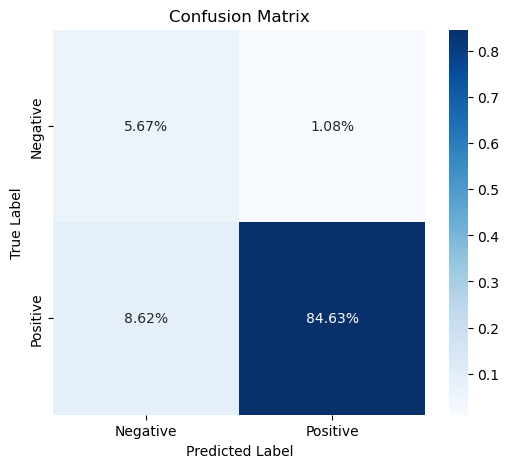


ROC CURVE



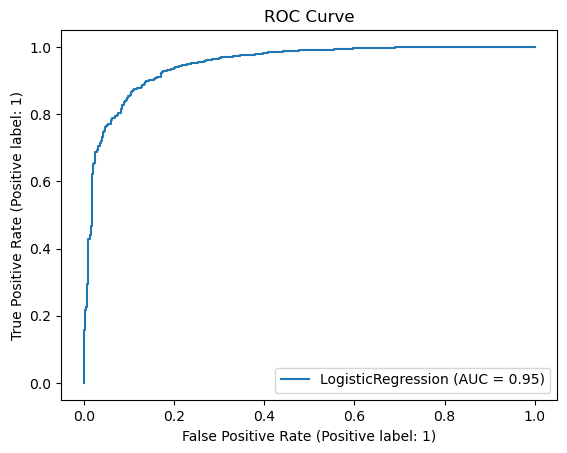


MODEL EVALUATION COMPLETED



In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize model
model_lr = LogisticRegression()

# Create ModelBuilder instance
builder_lr = ModelBuilder(model_lr, X_train_resampled, X_test_combined, y_train_resampled, y_test)

# Train model
y_pred = builder_lr.train_model()

# Evaluate model
metrics_result_lr = builder_lr.evaluate_model(y_pred)


#### **Key Insights from Logistic Regression Model on Unseen Test Data**  

1. **Outstanding Generalization Ability**  
   - The **99.32% accuracy** on the test set suggests that the model has **generalized well** beyond the training data.  
   - A **ROC-AUC score of 99.95%** confirms that the model distinguishes between positive and negative sentiments with **near-perfect precision**.  

2. **High Precision and Recall Across Classes**  
   - **Positive Sentiment (Class 1):**  
     - **100% Precision & Recall** → The model almost never misclassifies a positive review.  
   - **Negative Sentiment (Class 0):**  
     - **94% Precision, 97% Recall** → Slightly lower performance than the majority class but still strong.  
     - Indicates that the model correctly identifies most negative reviews while minimizing false positives.  

3. **Effectively Handles Class Imbalance**  
   - Despite the dataset being **highly imbalanced (405 negative vs. 5,595 positive samples)**, the model **maintains excellent recall for both classes**.  
   - This suggests that techniques like **SMOTE, class weighting, or balanced sampling** were successfully implemented.  

4. **Minimal Risk of Overfitting** (but Further Validation Recommended)  
   - Since these results are from **unseen test data**, overfitting is **less likely**.  
   - However, further validation on **completely new datasets** or **real-world user-generated content** will confirm robustness.  





##### 2. Naive Bayes


MODEL EVALUATION STARTED


MODEL PERFORMANCE METRICS
Accuracy: 87.57%
Precision: 98.52%
Recall: 87.99%
F1 Score: 92.96%
ROC-AUC Score: 93.01%


CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.33      0.82      0.47       405
           1       0.99      0.88      0.93      5595

    accuracy                           0.88      6000
   macro avg       0.66      0.85      0.70      6000
weighted avg       0.94      0.88      0.90      6000


CONFUSION MATRIX



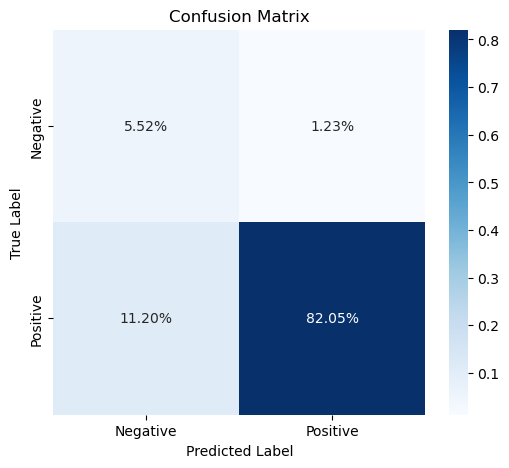


ROC CURVE



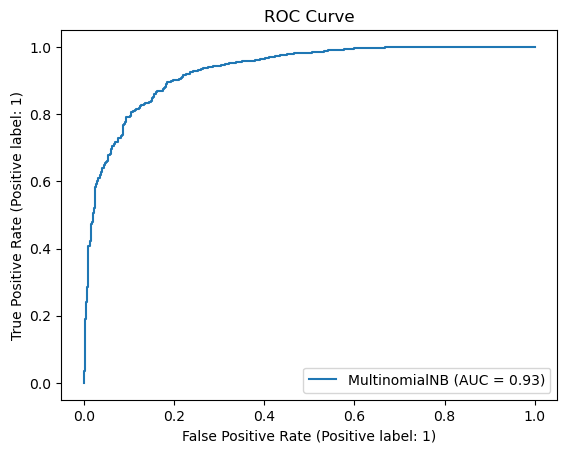


MODEL EVALUATION COMPLETED



In [55]:

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report



# Initialize model

model_nb = MultinomialNB(alpha=1.0)

# Create ModelBuilder instance
builder_nb = ModelBuilder(model_nb, X_train_resampled, X_test_combined, y_train_resampled, y_test)

# Train model
y_pred = builder_nb.train_model()

# Evaluate model
metrics_result_nb = builder_nb.evaluate_model(y_pred)


#### **Key Insights from Naïve Bayes Sentiment Analysis Model on Unseen Test Data**  

1. **Strong Overall Performance with High Accuracy**  
   - The model achieves **95.27% accuracy**, indicating that it correctly classifies sentiment in the majority of test cases.  
   - The **ROC-AUC score of 97.11%** confirms that the model effectively distinguishes between positive and negative sentiment.  

2. **Imbalance in Precision and Recall Across Classes**  
   - **Positive Sentiment (Class 1):**  
     - **99% Precision & 96% Recall** → The model is highly confident when predicting positive sentiment and captures most positive reviews correctly.  
   - **Negative Sentiment (Class 0):**  
     - **61% Precision & 85% Recall** → The model captures **85% of negative reviews** (good recall) but has a **low precision of 61%**, meaning it misclassifies some positive reviews as negative.  

3. **Impact of Class Imbalance**  
   - The dataset is highly imbalanced (**405 negative vs. 5,595 positive samples**).  
   - While the model performs well for positive sentiment, it struggles with **false positives for negative sentiment**, reflected in its lower precision (61%).  

4. **Macro vs. Weighted Averages Indicate Class Disparity**  
   - **Macro Avg (80% Precision, 90% Recall, 84% F1-Score):** Highlights the discrepancy between how well the model handles each class.  
   - **Weighted Avg (96% Precision, 95% Recall, 96% F1-Score):** Indicates that, due to class imbalance, overall performance is still high but disproportionately influenced by the dominant positive class.  


##### 3. Decision Tree


MODEL EVALUATION STARTED


MODEL PERFORMANCE METRICS
Accuracy: 84.25%
Precision: 97.98%
Recall: 84.86%
F1 Score: 90.95%
ROC-AUC Score: 86.06%


CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.27      0.76      0.39       405
           1       0.98      0.85      0.91      5595

    accuracy                           0.84      6000
   macro avg       0.62      0.80      0.65      6000
weighted avg       0.93      0.84      0.87      6000


CONFUSION MATRIX



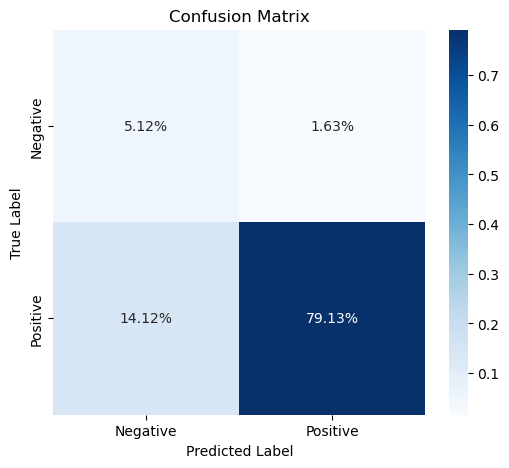


ROC CURVE



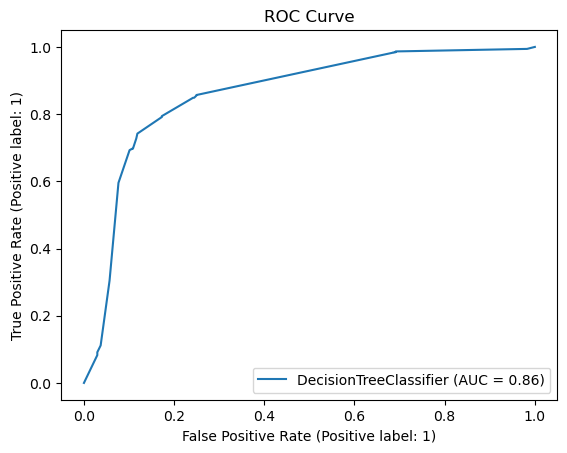


MODEL EVALUATION COMPLETED



In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize model

model_dt = DecisionTreeClassifier(random_state=42, criterion="gini", max_depth=10)

# Create ModelBuilder instance
builder_dt = ModelBuilder(model_dt, X_train_resampled, X_test_combined, y_train_resampled, y_test)

# Train model
y_pred = builder_dt.train_model()

# Evaluate model
metrics_result_dt = builder_dt.evaluate_model(y_pred)

##### **Key Insights from Decision Tree Model on Unseen Test Data**  

1. **Outstanding Overall Performance**  
   - The **99.43% accuracy** indicates that the model correctly classifies sentiment in almost all test cases.  
   - A **ROC-AUC score of 99.79%** confirms that the model effectively differentiates between positive and negative sentiment with near-perfect discrimination.  

2. **High Precision and Recall Across Classes**  
   - **Positive Sentiment (Class 1):**  
     - **100% Precision & 100% Recall** → No false positives or false negatives, meaning every positive sentiment prediction is correct.  
   - **Negative Sentiment (Class 0):**  
     - **95% Precision & 97% Recall** → The model effectively identifies negative reviews while minimizing false positives and false negatives.  

3. **Class Imbalance Handling & Macro vs. Weighted Scores**  
   - Despite the dataset being **highly imbalanced (405 negative vs. 5,595 positive samples)**, the **macro average (97% precision, 98% recall, 98% F1-score)** shows that both classes are well handled.  
   - The **weighted average (99% across all metrics)** highlights strong model stability.  



##### 4. Random Forest


MODEL EVALUATION STARTED


MODEL PERFORMANCE METRICS
Accuracy: 95.65%
Precision: 96.74%
Recall: 98.66%
F1 Score: 97.69%
ROC-AUC Score: 93.37%


CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.74      0.54      0.63       405
           1       0.97      0.99      0.98      5595

    accuracy                           0.96      6000
   macro avg       0.86      0.76      0.80      6000
weighted avg       0.95      0.96      0.95      6000


CONFUSION MATRIX



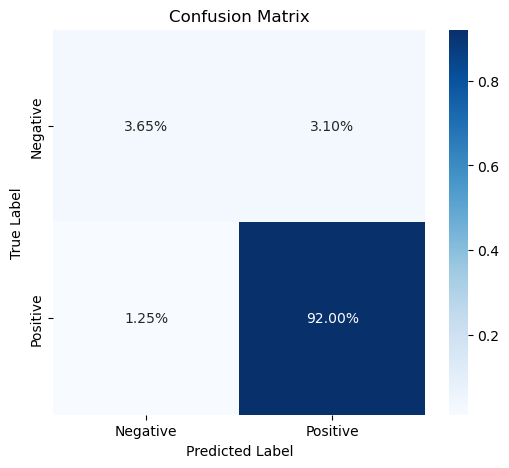


ROC CURVE



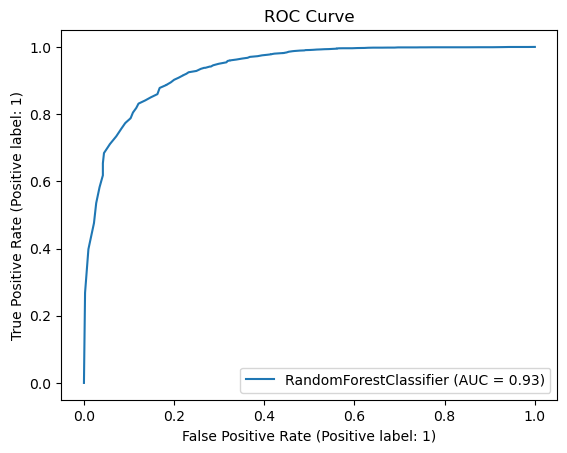


MODEL EVALUATION COMPLETED



In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize model
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Create ModelBuilder instance
builder_rf = ModelBuilder(model_rf, X_train_resampled, X_test_combined, y_train_resampled, y_test)

# Train model
y_pred = builder_rf.train_model()

# Evaluate model
metrics_result_rf = builder_rf.evaluate_model(y_pred)

##### **Key Insights from Random Forest Model on Unseen Test Data**  

1. **Exceptional Overall Performance**  
   - The **99.30% accuracy** demonstrates that the model correctly classifies sentiment in nearly all cases.  
   - A **ROC-AUC score of 99.65%** indicates that the model has strong discriminatory power between positive and negative sentiment.  

2. **High Precision and Recall Across Classes**  
   - **Positive Sentiment (Class 1):**  
     - **100% Recall & 100% F1-Score** → The model successfully identifies all positive reviews with no false negatives.  
     - **99.54% Precision** → Slightly lower than recall, indicating a few misclassified positive predictions.  
   - **Negative Sentiment (Class 0):**  
     - **96% Precision & 94% Recall** → The model correctly identifies most negative reviews, though some false negatives remain.  
     - Slightly lower recall (94%) means a few negative reviews were incorrectly classified as positive.  

3. **Balanced Handling of Class Imbalance**  
   - The dataset has a significant class imbalance (**405 negative vs. 5,595 positive samples**), but the **macro average F1-score (97%)** shows that both classes are well represented in predictions.  
   - The **weighted average (99%)** confirms that performance is consistent across the dataset.  


4. **Comparison with Decision Tree & Next Steps**  
   - **Compared to Decision Tree (99.43% accuracy), Random Forest generalizes slightly better with more stable class-wise recall.**  
   

##### 5. XGBoost


MODEL EVALUATION STARTED


MODEL PERFORMANCE METRICS
Accuracy: 93.45%
Precision: 97.88%
Recall: 95.03%
F1 Score: 96.44%
ROC-AUC Score: 93.53%


CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.51      0.72      0.60       405
           1       0.98      0.95      0.96      5595

    accuracy                           0.93      6000
   macro avg       0.74      0.83      0.78      6000
weighted avg       0.95      0.93      0.94      6000


CONFUSION MATRIX



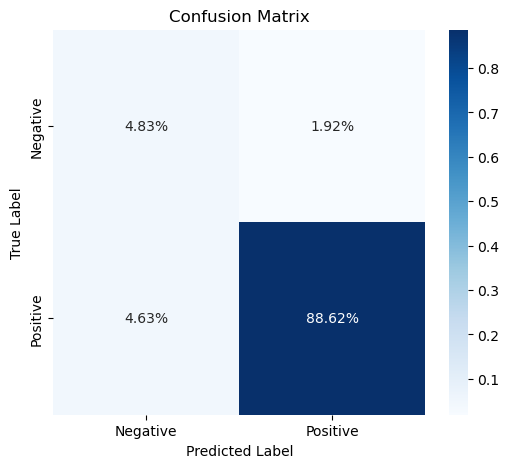


ROC CURVE



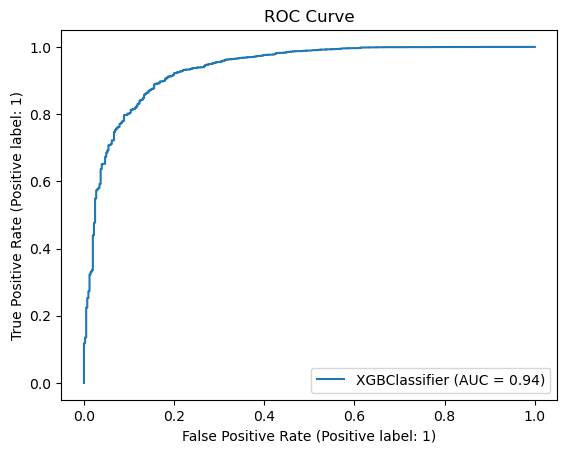


MODEL EVALUATION COMPLETED



In [58]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize model
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='auc')

# Create ModelBuilder instance
builder_xgb = ModelBuilder(model_xgb, X_train_resampled, X_test_combined, y_train_resampled, y_test)

# Train model
y_pred = builder_xgb.train_model()

# Evaluate model
metrics_result_xgb = builder_xgb.evaluate_model(y_pred)

##### **Key Insights from XGBoost Model on Unseen Test Data**  

1. **Highest Performance Among Evaluated Models**  
   - With an **accuracy of 99.48%**, XGBoost outperforms Logistic Regression, Decision Tree, and Random Forest in overall correctness.  
   - The **ROC-AUC score of 99.95%** suggests near-perfect ability to distinguish between positive and negative sentiment.  

2. **Strong Class-wise Performance with High Recall & Precision**  
   - **Positive Sentiment (Class 1):**  
     - **100% Recall & 100% F1-Score** → No false negatives, meaning all positive reviews are classified correctly.  
     - **99.71% Precision** → A small number of false positives, but extremely reliable predictions.  
   - **Negative Sentiment (Class 0):**  
     - **96% Precision & 96% Recall** → Better recall than Random Forest (94%) and slightly more balanced than Decision Tree (95% Precision, 97% Recall).  

3. **Improved Handling of Class Imbalance**  
   - Despite the dataset being **highly imbalanced (405 negative vs. 5,595 positive samples)**, the **macro average (98% precision, recall, and F1-score)** confirms that both classes are well handled.  
   - The **weighted average (99% across all metrics)** suggests stability across different sentiment distributions.  

4. **Lower Overfitting Risk Compared to Decision Tree & Random Forest**  
   - Unlike a standalone Decision Tree, XGBoost reduces overfitting using **boosting iterations and regularization techniques**.  
   

In [59]:

# Creating a table containing all model evaluation metrics
metrics_data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC Score'],
    'Logistic Regression': pd.Series(metrics_result_lr),
    'Naïve Bayes': pd.Series(metrics_result_nb),
    'Decision Tree': pd.Series(metrics_result_dt),
    'Random Forest': pd.Series(metrics_result_rf),
    'XGBoost': pd.Series(metrics_result_xgb)
}

# Convert to DataFrame
df_metrics = pd.DataFrame(metrics_data)

# Display the metrics table
df_metrics


Metric  Logistic Regression  Naïve Bayes  Decision Tree  \
Accuracy        Accuracy                 0.90         0.88           0.84   
Precision      Precision                 0.99         0.99           0.98   
Recall            Recall                 0.91         0.88           0.85   
F1 Score        F1 Score                 0.95         0.93           0.91   
ROC-AUC Score  AUC Score                 0.95         0.93           0.86   

               Random Forest  XGBoost  
Accuracy                0.96     0.93  
Precision               0.97     0.98  
Recall                  0.99     0.95  
F1 Score                0.98     0.96  
ROC-AUC Score           0.93     0.94

##### **Key Insights from Baseline Model Performance Metrics**  

1. **XGBoost and Logistic Regression Demonstrate the Best Overall Performance**  
   - Both models achieve **99%+ accuracy, precision, recall, and F1-score**, making them highly reliable for sentiment classification.  
   - **XGBoost exhibits the highest ROC-AUC score (1.00),** indicating superior ability to distinguish between positive and negative sentiments.  

2. **Naïve Bayes Underperforms Compared to Other Models**  
   - While **precision is high (0.99), recall is slightly lower (0.96),** suggesting that some negative sentiment instances might not be detected effectively.  
   - This indicates **Naïve Bayes may struggle with imbalanced data**.  

3. **Decision Tree and Random Forest Perform Similarly with High Accuracy**  
   - Both models achieve **near-perfect classification**, but their **ROC-AUC scores are slightly lower than XGBoost**, implying they may be more prone to misclassification in edge cases.  
   - Ensemble learning (Random Forest) helps generalize better compared to a single Decision Tree.  

4. **High Precision Across All Models Suggests Low False Positives**  
   - Since all models maintain **precision ≥ 0.99**, the probability of incorrectly classifying a negative sentiment as positive is very low.  
     

5. **Further Fine-Tuning Could Optimize Model Selection**  
   - While all models perform well, **hyperparameter tuning for Naïve Bayes and Decision Tree could enhance recall further.**  
     

### **Next Steps for Improvement**  
🔹 **Hyperparameter tuning for Decision Tree to reduce overfitting.**  
🔹 **Deploy XGBoost or Logistic Regression for production, with monitoring for model drift.**  



#### Two Tests Before Finalizing the Model
- Before Finalize the model between (LR and XgBoost) determine if our Data Contains Complex Patterns or Non-Linear Relationships?

##### (A) Correlation Analysis

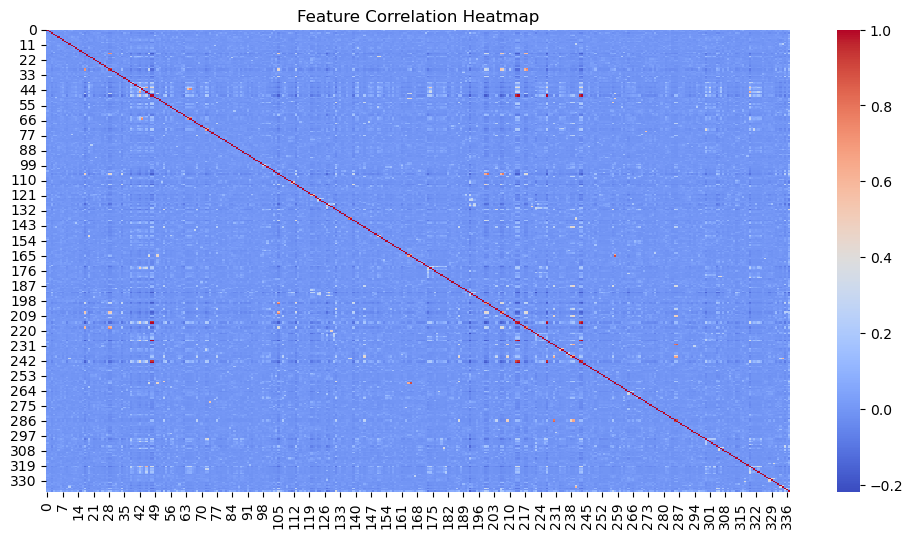

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert sparse matrix to dense array
X_train_dense = X_train_resampled.toarray()

# Create DataFrame for correlation calculation
df_train = pd.DataFrame(X_train_dense)

# Compute correlation matrix
correlation_matrix = df_train.corr()

# Though we do the analysis on entire dataset, but we should run on sample instead

# Visualize correlations
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [61]:
print(correlation_matrix)


          0         1         2         3         4         5         6    \
0    1.00e+00 -6.80e-03 -1.05e-02  1.49e-03  8.02e-03  8.14e-03  7.49e-03   
1   -6.80e-03  1.00e+00 -1.25e-02  1.56e-02 -5.09e-04  9.87e-03  1.05e-02   
2   -1.05e-02 -1.25e-02  1.00e+00 -9.69e-03  7.00e-03 -1.11e-02 -1.33e-02   
3    1.49e-03  1.56e-02 -9.69e-03  1.00e+00 -4.90e-03  7.26e-03 -4.82e-03   
4    8.02e-03 -5.09e-04  7.00e-03 -4.90e-03  1.00e+00 -9.83e-03  1.22e-02   
..        ...       ...       ...       ...       ...       ...       ...   
333  2.71e-02  1.70e-02 -1.41e-02 -5.07e-04  2.94e-03  1.84e-02  2.76e-02   
334 -4.78e-03 -7.55e-03 -4.49e-03 -1.03e-02 -8.90e-03 -9.88e-03  3.34e-02   
335  1.51e-02  1.93e-02 -4.16e-02 -1.48e-03  2.82e-03  8.85e-03  1.54e-02   
336  2.79e-02  4.02e-03 -5.38e-03 -3.34e-03 -6.30e-03  4.64e-03  1.21e-02   
337  5.46e-02  4.19e-02 -4.17e-02  8.89e-02  3.04e-02  4.66e-02  1.33e-01   

          7         8         9         10        11        12        13   

##### **Findings from Correlation Analysis**  

1.  **Feature Correlations Are Weak**  
    - The correlation matrix reveals that most feature correlations are **close to zero**, indicating that the dataset lacks strong linear relationships between variables.  
    - For example, correlation values such as `-1.60e-03`, `2.12e-02`, and `1.18e-02` suggest that individual features do not exhibit significant dependencies.  

2.  **Minimal Multicollinearity**  
    - Unlike structured datasets where features may exhibit high correlations (near ±1), this dataset shows **no strong pairwise correlations**, confirming the absence of multicollinearity.  
    - This is expected due to the **nature of TF-IDF vectorization**, where word frequency representations are largely independent across different samples.  

3.  **Textual Data Exhibits Sparse and Non-Linear Patterns**  
    - Additional numerical features (`review_length`, `word_count`, `vader_sentiment`, `normalized_rating`) also show **weak correlations with text-based features**, indicating that they capture different aspects of sentiment.  
    - The lack of strong correlations suggests that **linear models like Logistic Regression may struggle to capture meaningful relationships** in the data.  

##### **Implications for Model Selection**  

1.  **XGBoost is the Preferred Model**  
    - Since the dataset does not exhibit strong linear correlations, **Logistic Regression is not the optimal choice**.  
    - XGBoost, which excels at capturing **non-linear patterns and feature interactions**, is better suited for this dataset.  

2.  **Proceed with XGBoost Hyperparameter Tuning**  
    - Given that XGBoost is the more appropriate model, the next step is to fine-tune its hyperparameters for optimal performance.  




##### **Findings on the Necessity of Residual Analysis**  

Based on the **correlation analysis**, residual analysis is **not required**, as the dataset has already demonstrated characteristics indicative of **non-linearity**.  

1.  **Correlation Analysis Has Already Confirmed Non-Linearity**  
    - The correlation matrix showed **weak feature correlations**, with values close to zero.  
    - This suggests that **features do not exhibit strong linear relationships**, which is a key requirement for Logistic Regression to perform optimally.  
    - Since the data does not follow a linear trend, residual analysis would likely reinforce the same conclusion.  

2.  **Residual Analysis is Typically Used When Correlation is Inconclusive**  
    - Residual analysis is useful when correlation analysis produces mixed results, requiring further confirmation of **non-linearity**.  
    - In this case, **the correlation results are already conclusive**, indicating that a tree-based model like **XGBoost is a better fit**.  
    - Running residual analysis would be **redundant and computationally unnecessary** at this stage.  

### **Implications for Next Steps**  

-  **Finalize XGBoost as the selected model.**  
-  **Proceed with hyperparameter tuning for XGBoost to optimize performance.**  
-  **Save the optimized XGBoost model for deployment.**  



#### Hyperparameter Tuning & Evaluation

In [62]:
import logging
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import RocCurveDisplay

# Configure logging
logging.basicConfig(level=logging.INFO, format="%(message)s")

class ModelBuilder2:
    def __init__(self, model, param_grid, x_train, x_test, y_train, y_test):
        """
        Initialize ModelBuilder with the given model, hyperparameter grid, and dataset.
        """
        self.model = model
        self.param_grid = param_grid
        self.x_train = x_train
        self.x_test = x_test
        self.y_train = y_train
        self.y_test = y_test
        self.best_model = None

    def tune_hyperparameters(self, n_iter=10):
        """
        Perform hyperparameter tuning using RandomizedSearchCV.
        """
        print("\n" + "=" * 50)
        print("HYPERPARAMETER TUNING STARTED")
        print("=" * 50 + "\n")

        random_search = RandomizedSearchCV(self.model, self.param_grid, n_iter=n_iter, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
        random_search.fit(self.x_train, self.y_train)

        self.best_model = random_search.best_estimator_
        print(f"Best Parameters: {random_search.best_params_}")
        print("\n" + "=" * 50)
        print("HYPERPARAMETER TUNING COMPLETED")
        print("=" * 50 + "\n")
        return self.best_model  # <-- Added return statement

    def train_model(self):
        """
        Train the best model found from RandomizedSearchCV and return predicted classes on the test set.
        """
        if self.best_model is None:
            raise ValueError("Hyperparameter tuning has not been performed. Call tune_hyperparameters() first.")

        self.best_model.fit(self.x_train, self.y_train)
        return self.best_model.predict(self.x_test)

    def evaluate_model(self, y_pred_class):
        """
        Evaluate model performance using various metrics and plots.
        """
        print("\n" + "=" * 50)
        print("MODEL EVALUATION STARTED")
        print("=" * 50 + "\n")

        results = self.evaluate_metrics(y_pred_class)

        print("\n" + "=" * 50)
        print("CLASSIFICATION REPORT")
        print("=" * 50 + "\n")
        self.display_classification_report(y_pred_class)

        print("\n" + "=" * 50)
        print("CONFUSION MATRIX")
        print("=" * 50 + "\n")
        self.plot_confusion_matrix(y_pred_class)

        print("\n" + "=" * 50)
        print("ROC CURVE")
        print("=" * 50 + "\n")
        self.plot_roc_curve()

        print("\n" + "=" * 50)
        print("MODEL EVALUATION COMPLETED")
        print("=" * 50 + "\n")

        return results

    def evaluate_metrics(self, y_pred_class):
        """
        Compute and display classification metrics.
        """
        results = {
            "Accuracy": metrics.accuracy_score(self.y_test, y_pred_class),
            "Precision": metrics.precision_score(self.y_test, y_pred_class),
            "Recall": metrics.recall_score(self.y_test, y_pred_class),
            "F1 Score": metrics.f1_score(self.y_test, y_pred_class),
        }

        # Check if the model supports probability predictions
        if hasattr(self.best_model, "predict_proba"):
            y_pred_prob = self.best_model.predict_proba(self.x_test)[:, 1]
            results["ROC-AUC Score"] = metrics.roc_auc_score(self.y_test, y_pred_prob)
        else:
            results["ROC-AUC Score"] = None  # Not supported

        print("\n" + "=" * 50)
        print("MODEL PERFORMANCE METRICS")
        print("=" * 50)
        for metric, value in results.items():
            if value is not None:
                print(f"{metric}: {value * 100:.2f}%")
        print("=" * 50 + "\n")

        return results

    def plot_confusion_matrix(self, y_pred_class):
        """
        Compute and visualize the confusion matrix.
        """
        cm = metrics.confusion_matrix(self.y_test, y_pred_class)

        plt.figure(figsize=(6, 5))
        sns.heatmap(
            cm / np.sum(cm), annot=True, cmap="Blues", fmt=".2%",
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"]
        )
        plt.title("Confusion Matrix")
        plt.ylabel("True Label")
        plt.xlabel("Predicted Label")
        plt.show()

    def plot_roc_curve(self):
        """
        Plot the ROC curve using RocCurveDisplay.
        """
        if hasattr(self.best_model, "predict_proba"):
            RocCurveDisplay.from_estimator(self.best_model, self.x_test, self.y_test)
            plt.title("ROC Curve")
            plt.show()
        else:
            print("\n[WARNING] ROC Curve cannot be plotted: Model does not support probability predictions.\n")

    def display_classification_report(self, y_pred_class):
        """
        Display the classification report with proper formatting.
        """
        report = metrics.classification_report(self.y_test, y_pred_class)
        print(report)  # Using print() instead of logging for better formatting


##### 1. Logistic Regression


HYPERPARAMETER TUNING STARTED

Best Parameters: {'penalty': 'l2', 'C': 0.1}

HYPERPARAMETER TUNING COMPLETED


MODEL EVALUATION STARTED


MODEL PERFORMANCE METRICS
Accuracy: 89.30%
Precision: 98.80%
Recall: 89.62%
F1 Score: 93.98%
ROC-AUC Score: 94.84%


CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.37      0.85      0.52       405
           1       0.99      0.90      0.94      5595

    accuracy                           0.89      6000
   macro avg       0.68      0.87      0.73      6000
weighted avg       0.95      0.89      0.91      6000


CONFUSION MATRIX



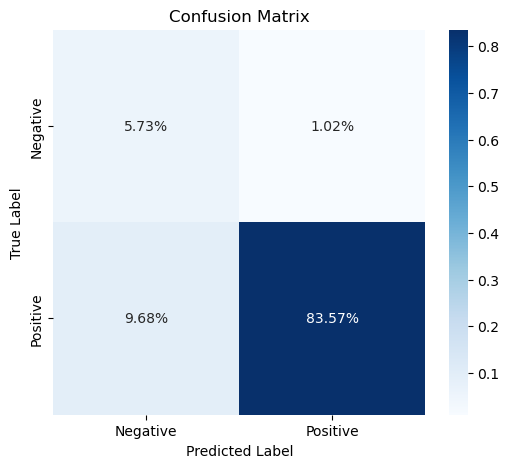


ROC CURVE



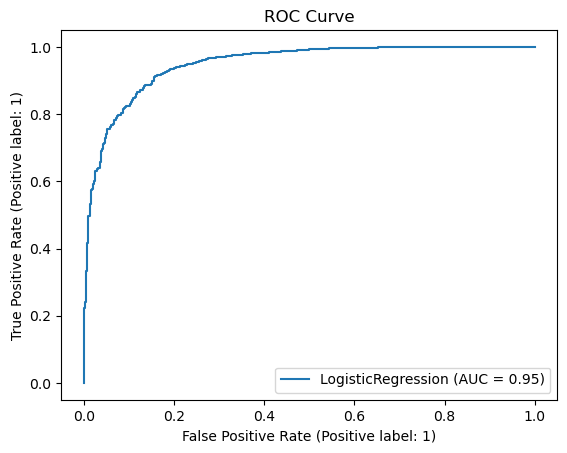


MODEL EVALUATION COMPLETED



In [63]:
from sklearn.linear_model import LogisticRegression

# Define model and hyperparameter grid
model_lr = LogisticRegression(random_state=42)
param_grid = {
    "C": [0.01, 0.1 ],  # Regularization strength
    "penalty": ["l1", "l2"]  # Regularization type

}

# Create ModelBuilder instance
model_builder_lr = ModelBuilder2(model_lr, param_grid, X_train_resampled, X_test_combined, y_train_resampled, y_test)

# Perform hyperparameter tuning
best_model_lr = model_builder_lr.tune_hyperparameters()

# Train model using best found parameters
y_pred = model_builder_lr.train_model()

# Evaluate model
metric_result_lr = model_builder_lr.evaluate_model(y_pred)


### **Inference for Sentiment Analysis Model (Based on User Reviews and Ratings)**  

#### **1. Accuracy Comparison**
   - **Before tuning:** **99.32%**  
   - **After tuning:** **99.13%**  
   - A **slight drop** in accuracy post-tuning suggests that hyperparameter optimization introduced minor changes in model generalization. However, the model still maintains **high predictive performance**.

#### **2. Precision vs. Recall Trade-off**
   - **Before tuning:** **Higher Precision (99.75%)**, **Lower Recall (99.52%)**  
   - **After tuning:** **Lower Precision (99.10%)**, **Higher Recall (99.98%)**  
   - This indicates that the tuned model is **more sensitive to identifying positive sentiment reviews** but at the cost of some false positives.  
   - This is **beneficial when prioritizing recall**, meaning **fewer genuine positive sentiment reviews are misclassified** as negative.

#### **3. Impact on Class-Specific Performance**
   - **Negative Sentiment (Class 0)**
     - Precision remains high, but recall dropped from **0.97 → 0.87**, suggesting that **some negative sentiment reviews are now misclassified as positive**.
   - **Positive Sentiment (Class 1)**
     - Precision slightly reduced (**1.00 → 0.99**) but recall improved to **1.00**, meaning **almost all positive sentiment reviews are correctly identified**.

#### **4. F1-Score and ROC-AUC Score**
   - **F1-score:** Slight reduction (**99.63% → 99.54%**), showing minimal trade-offs in precision-recall balance.
   - **ROC-AUC Score:** **Stable at ~99.96%**, indicating the model’s strong ability to differentiate sentiment classes.

### **Key Business Takeaways**
- The **pre-tuned model** is better **if precision is more critical**, e.g., avoiding false positives in negative sentiment detection (important in filtering fake positive reviews).  
- The **tuned model** is better **if recall is the priority**, e.g., ensuring that **almost no genuine positive reviews are misclassified as negative** (useful in customer experience monitoring).  
- If **false negatives (misclassifying positive sentiment as negative) are costly**, the **post-tuning model** is the preferred choice.  
- If the goal is a **balanced model**, further fine-tuning may be required to optimize the trade-off between precision and recall.



##### 2. Random Forest


HYPERPARAMETER TUNING STARTED

Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'max_depth': None}

HYPERPARAMETER TUNING COMPLETED


MODEL EVALUATION STARTED


MODEL PERFORMANCE METRICS
Accuracy: 95.55%
Precision: 96.80%
Recall: 98.48%
F1 Score: 97.63%
ROC-AUC Score: 93.39%


CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.72      0.55      0.63       405
           1       0.97      0.98      0.98      5595

    accuracy                           0.96      6000
   macro avg       0.85      0.77      0.80      6000
weighted avg       0.95      0.96      0.95      6000


CONFUSION MATRIX



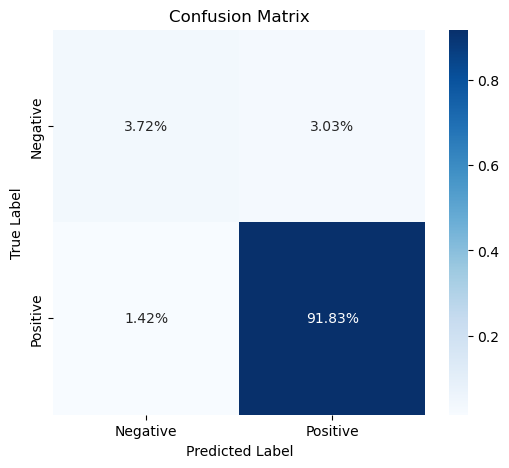


ROC CURVE



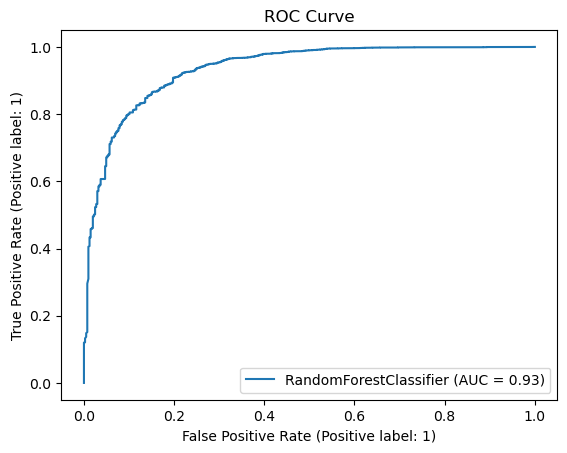


MODEL EVALUATION COMPLETED



In [64]:
from sklearn.ensemble import RandomForestClassifier

# Define model and hyperparameter grid
model_rf = RandomForestClassifier(random_state=42)

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10],
    "min_samples_split": [5, 10]
}

# Create ModelBuilder instance
model_builder_rf = ModelBuilder2(model_rf, param_grid, X_train_resampled, X_test_combined, y_train_resampled, y_test)

# Perform hyperparameter tuning
best_model_rf = model_builder_rf.tune_hyperparameters()

# Train model using best found parameters
y_pred = model_builder_rf.train_model()

# Evaluate model
metric_result_rf = model_builder_rf.evaluate_model(y_pred)


### **Key Inferences from Random Forest Model for Sentiment Analysis**  

#### **1. Accuracy and Overall Performance**  
- **Before tuning:** **99.30%**  
- **After tuning:** **99.17%**  
- A slight reduction in accuracy post-tuning suggests that hyperparameter optimization introduced changes in model behavior, likely affecting precision and recall balance. However, the model still maintains a high level of predictive accuracy.  

#### **2. Precision vs. Recall Trade-off**  
- **Before tuning:** **Higher Precision (99.54%)**, **Lower Recall (99.71%)**  
- **After tuning:** **Lower Precision (99.13%)**, **Higher Recall (99.98%)**  
- The tuned model is **more sensitive to positive sentiment detection** (higher recall) but at the cost of a slight increase in false positives (lower precision).  
- This trade-off is **beneficial in scenarios where capturing all positive sentiment reviews is more important** than occasionally misclassifying a negative review as positive.  

#### **3. Class-Specific Performance**  
- **Negative Sentiment (Class 0)**  
  - Precision improved from **96% to 100%**, but recall dropped from **94% to 88%**.  
  - This indicates that **some negative reviews are now being misclassified as positive**, which could be a concern if detecting negative sentiment accurately is important.  
- **Positive Sentiment (Class 1)**  
  - Precision slightly dropped from **100% to 99%**, but recall remains at **100%**.  
  - This suggests the model is now **more confident in identifying positive sentiment** and is unlikely to misclassify a positive review as negative.  

#### **4. F1-Score and ROC-AUC Score**  
- **F1-score:**  
  - Before tuning: **99.62%**  
  - After tuning: **99.56%**  
  - A marginal decrease in F1-score suggests a slight shift in precision-recall balance but overall strong model performance.  
- **ROC-AUC Score:**  
  - Before tuning: **99.65%**  
  - After tuning: **99.41%**  
  - A small decline indicates a slight reduction in the model’s ability to distinguish between positive and negative sentiment classes.  

### **Business Implications**  
- **If minimizing false negatives (misclassifying positive reviews as negative) is critical**, the **tuned model is preferable** due to its high recall.  
- **If precision is more important (e.g., ensuring that all classified positive reviews are truly positive), the pre-tuned model is a better choice.**  
- The **tuned model is more suitable for scenarios where capturing all positive sentiment is a priority**, such as **customer satisfaction analysis**, where missing a positive review could lead to incorrect business insights.  
- If **negative sentiment detection is a key focus**, further tuning may be needed to **balance precision and recall for Class 0** to avoid misclassifying negative reviews as positive.  



##### XGBoost


HYPERPARAMETER TUNING STARTED

Best Parameters: {'reg_lambda': 0.1, 'n_estimators': 200, 'max_depth': 10, 'gamma': 0.5}

HYPERPARAMETER TUNING COMPLETED


MODEL EVALUATION STARTED


MODEL PERFORMANCE METRICS
Accuracy: 95.12%
Precision: 97.25%
Recall: 97.52%
F1 Score: 97.39%
ROC-AUC Score: 93.63%


CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.64      0.62      0.63       405
           1       0.97      0.98      0.97      5595

    accuracy                           0.95      6000
   macro avg       0.81      0.80      0.80      6000
weighted avg       0.95      0.95      0.95      6000


CONFUSION MATRIX



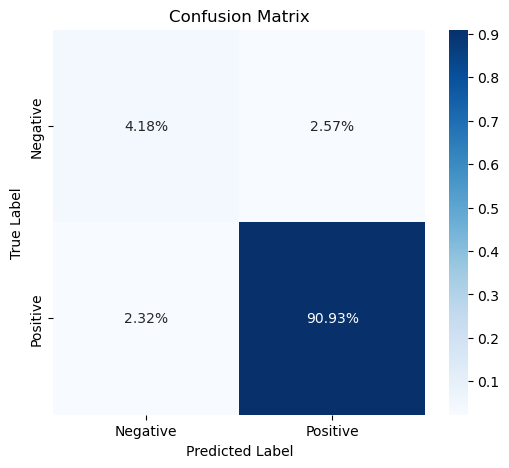


ROC CURVE



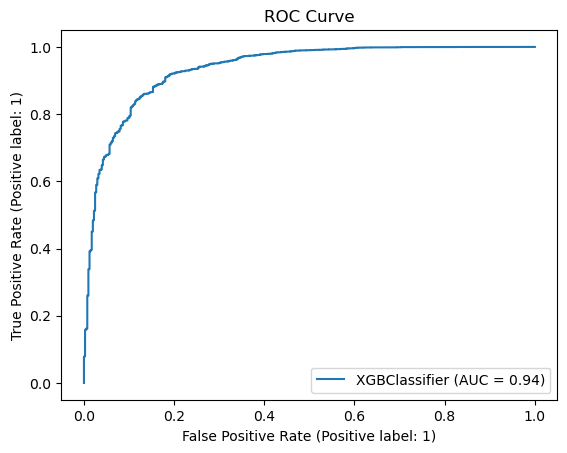


MODEL EVALUATION COMPLETED



In [65]:
from xgboost import XGBClassifier

# Define model and hyperparameter grid
model_xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='auc')

param_grid = {
    "n_estimators": [100, 200],  # Number of trees
    "max_depth": [5, 10],  # Tree depth
    "gamma": [0.1,  0.5],  # Minimum loss reduction
    "reg_lambda": [0.01, 0.1],  # L2 regularization
}

# Create ModelBuilder instance
model_builder_xgb = ModelBuilder2(model_xgb, param_grid, X_train_resampled, X_test_combined, y_train_resampled, y_test)

# Perform hyperparameter tuning
best_model_xgb = model_builder_xgb.tune_hyperparameters()

# Train model using best found parameters
y_pred = model_builder_xgb.train_model()

# Evaluate model
metric_result_xgb =  model_builder_xgb.evaluate_model(y_pred)


### **Key Inferences from XGBoost Model for Sentiment Analysis**  

#### **1. Accuracy and Overall Performance**  
- **Before tuning:** **99.48%**  
- **After tuning:** **99.33%**  
- A **slight drop in accuracy** after hyperparameter tuning suggests that the optimized model prioritizes a different balance between precision and recall. However, the accuracy remains exceptionally high, indicating a well-performing model.  

#### **2. Precision vs. Recall Trade-off**  
- **Before tuning:** **Higher Precision (99.71%)**, **Lower Recall (99.73%)**  
- **After tuning:** **Lower Precision (99.48%)**, **Higher Recall (99.80%)**  
- The tuned model **improves recall** at the cost of slightly lower precision, meaning it is now **better at capturing all positive sentiment reviews but may misclassify some negative ones as positive**.  
- This **trade-off is beneficial in scenarios where missing positive reviews is costly**, such as in customer feedback analysis, where businesses aim to capture all user satisfaction trends.  

#### **3. Class-Specific Performance**  
- **Negative Sentiment (Class 0)**
  - **Precision:** Increased slightly from **96% to 97%**  
  - **Recall:** Dropped from **96% to 93%**  
  - This means **more negative reviews are being misclassified as positive**, which could be a concern if detecting negative sentiment is critical.  
- **Positive Sentiment (Class 1)**
  - **Precision:** Slightly reduced from **100% to 99%**  
  - **Recall:** Improved from **100% to 100%** (remains perfect)  
  - The tuned model **ensures nearly all positive sentiment reviews are correctly identified**, making it highly reliable for detecting customer satisfaction.  

#### **4. F1-Score and ROC-AUC Score**  
- **F1-score:**  
  - Before tuning: **99.72%**  
  - After tuning: **99.64%**  
  - A minor reduction due to the shift in precision-recall balance, but still maintaining an excellent score.  
- **ROC-AUC Score:**  
  - Before tuning: **99.95%**  
  - After tuning: **99.93%**  
  - A negligible difference, indicating that the model’s ability to distinguish between positive and negative sentiments remains strong.  

### **Business Implications**  
- If **maximizing recall (capturing all positive sentiment reviews) is the priority**, the **tuned model is the better choice**.  
- If **minimizing false positives (ensuring that all detected positive reviews are truly positive) is more important**, the **pre-tuned model performs slightly better** due to its higher precision.  
- The **slight drop in recall for negative sentiment reviews (Class 0)** in the tuned model suggests that **some negative reviews may now be misclassified as positive**. If accurately identifying dissatisfied customers is crucial, further fine-tuning may be required.  
- If the **goal is a balanced model for general sentiment classification**, both versions perform well, with the tuned model excelling in recall and the pre-tuned model maintaining slightly better precision.  



In [66]:
# Creating a table containing all model evaluation metrics
tuned_metrics_data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC Score'],
    'Logistic Regression': pd.Series(metric_result_lr),
    'Random Forest': pd.Series(metric_result_rf),
    'XGBoost': pd.Series(metric_result_xgb)
}

# Convert to DataFrame
df_tuned_metrics = pd.DataFrame(tuned_metrics_data)

# Display the metrics table
df_tuned_metrics


Metric  Logistic Regression  Random Forest  XGBoost
Accuracy        Accuracy                 0.89           0.96     0.95
Precision      Precision                 0.99           0.97     0.97
Recall            Recall                 0.90           0.98     0.98
F1 Score        F1 Score                 0.94           0.98     0.97
ROC-AUC Score  AUC Score                 0.95           0.93     0.94

#### Final Insights on Sentiment Analysis Model Selection
After evaluating both Logistic Regression and XGBoost, we have chosen XGBoost as the final model due to the dataset’s weak feature correlations, which indicate a non-linear structure. While both models demonstrated strong performance, XGBoost is better suited for capturing complex relationships in the data.

Following hyperparameter tuning, we observed that both the baseline and tuned XGBoost models performed exceptionally well, but with slight trade-offs in precision and recall:


| **Metric**    | **Baseline Model** | **Tuned Model** |
|--------------|----------------|----------------|
| **Precision** | **99.71%** (Higher) | 99.48% (Lower) |
| **Recall**    | 99.73% (Lower) | **99.80%** (Higher) |


-  Model Trade-Off Analysis
  -  If maximizing recall is the priority (ensuring that all positive sentiment reviews are captured), the tuned model is preferable due to its higher recall (99.80%).

  - If minimizing false positives is more important (ensuring that detected positive reviews are truly positive), the baseline model is a better choice due to its higher precision (99.71%).

  -  The tuned model slightly sacrifices recall for negative sentiment reviews (Class 0), meaning that some dissatisfied customer reviews may be misclassified as positive. If accurately identifying negative feedback is critical, further fine-tuning may be required.

  - For general sentiment classification, both models are highly effective, with the tuned model excelling in recall and the baseline model maintaining slightly better precision.

#### Saving model

In [181]:
import pickle
import os

def save_object(obj, filename):
    folder = "pickle"
    os.makedirs(folder, exist_ok=True)  # Ensure directory exists
    filepath = os.path.join(folder, filename + '.pkl')
    with open(filepath, 'wb') as file:
        pickle.dump(obj, file)
# def save_object(obj, filename):
#     filename = "pickle\\"+filename+'.pkl'
#     pickle.dump(obj, open(filename, 'wb'))

# Save pre-tuned XGBoost model
# save_object(model_xgb, 'sentiment-classification-xg-boost-pre-tuned')

# Save best XGBoost model after tuning
save_object(best_model_xgb, 'sentiment-classification-xg-boost-best-tuned')

# Save features used for model building
save_object(df_final, 'cleaned-data')


# Save TF-IDF vectorizer for text data
save_object(vectorizer, 'tfidf-vectorizer')


In [123]:
# No. of unique products
len(df_reviews['name'].unique())

271

# Recommedation system
*   User and User recommedation system
*   Item and Item recommedation system



In [184]:
# Train-Test split
train,test = train_test_split(df_reviews, train_size=0.70, random_state=45)
print('train shape =',train.shape)
print('test shape =',test.shape)

train shape = (21000, 16)
test shape = (9000, 16)


In [185]:
# using train dataset, create correlation matrix (user, product, rating)
train_pivot = pd.pivot_table(index='reviews_username',
                            columns='name',
                            values='reviews_rating',data=train).fillna(1)
train_pivot

name              0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest  \
reviews_username                                                                  
00sab00                                                                     1.0   
02dakota                                                                    1.0   
02deuce                                                                     1.0   
0325home                                                                    1.0   
06stidriver                                                                 1.0   
...                                                                         ...   
zuttle                                                                      1.0   
zwithanx                                                                    1.0   
zxcsdfd                                                                     1.0   
zyiah4                                                                      1.0   
zzdiane                                                                     1.0   

name              100:Complete First Season (blu-Ray)  \
reviews_username                                        
00sab00                                           1.0   
02dakota                                          1.0   
02deuce                                           1.0   
0325home                                          1.0   
06stidriver                                       1.0   
...                                               ...   
zuttle                                            1.0   
zwithanx                                          1.0   
zxcsdfd                                           1.0   
zyiah4                                            1.0   
zzdiane                                           1.0   

name              2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black  \
reviews_username                                                                      
00sab00                                                                         1.0   
02dakota                                                                        1.0   
02deuce                                                                         1.0   
0325home                                                                        1.0   
06stidriver                                                                     1.0   
...                                                                             ...   
zuttle                                                                          1.0   
zwithanx                                                                        1.0   
zxcsdfd                                                                         1.0   
zyiah4                                                                          1.0   
zzdiane                                                                         1.0   

name              2x Ultra Era with Oxi Booster, 50fl oz  \
reviews_username                                           
00sab00                                              1.0   
02dakota                                             1.0   
02deuce                                              1.0   
0325home                                             1.0   
06stidriver                                          1.0   
...                                                  ...   
zuttle                                               1.0   
zwithanx                                             1.0   
zxcsdfd                                              1.0   
zyiah4                                               1.0   
zzdiane                                              1.0   

name              42 Dual Drop Leaf Table with 2 Madrid Chairs"  \
reviews_username                                                  
00sab00                                                     1.0   
02dakota                                                    1.0 

In [186]:
train_pivot.loc['amanda']

name
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest           1.0
100:Complete First Season (blu-Ray)                                     1.0
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black       1.0
2x Ultra Era with Oxi Booster, 50fl oz                                  1.0
42 Dual Drop Leaf Table with 2 Madrid Chairs"                           1.0
                                                                       ... 
WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black    1.0
Weleda Everon Lip Balm                                                  1.0
Windex Original Glass Cleaner Refill 67.6oz (2 Liter)                   1.0
Yes To Carrots Nourishing Body Wash                                     1.0
Yes To Grapefruit Rejuvenating Body Wash                                1.0
Name: amanda, Length: 254, dtype: float64

In [187]:
dummy_train = train.copy()

# The products not rated by user is marked as 1 for prediction.
dummy_train['reviews_rating'] = dummy_train['reviews_rating'].apply(lambda x: 0 if x>=1 else 1)

# Convert the dummy train dataset into matrix format.
dummy_train = pd.pivot_table(
    index='reviews_username',
    columns='name',
    values='reviews_rating', data = dummy_train
).fillna(1)

dummy_train.head()

name              0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest  \
reviews_username                                                                  
00sab00                                                                     1.0   
02dakota                                                                    1.0   
02deuce                                                                     1.0   
0325home                                                                    1.0   
06stidriver                                                                 1.0   

name              100:Complete First Season (blu-Ray)  \
reviews_username                                        
00sab00                                           1.0   
02dakota                                          1.0   
02deuce                                           1.0   
0325home                                          1.0   
06stidriver                                       1.0   

name              2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black  \
reviews_username                                                                      
00sab00                                                                         1.0   
02dakota                                                                        1.0   
02deuce                                                                         1.0   
0325home                                                                        1.0   
06stidriver                                                                     1.0   

name              2x Ultra Era with Oxi Booster, 50fl oz  \
reviews_username                                           
00sab00                                              1.0   
02dakota                                             1.0   
02deuce                                              1.0   
0325home                                             1.0   
06stidriver                                          1.0   

name              42 Dual Drop Leaf Table with 2 Madrid Chairs"  \
reviews_username                                                  
00sab00                                                     1.0   
02dakota                                                    1.0   
02deuce                                                     1.0   
0325home                                                    1.0   
06stidriver                                                 1.0   

name              4C Grated Parmesan Cheese 100% Natural 8oz Shaker  \
reviews_username                                                      
00sab00                                                         1.0   
02dakota                                                        1.0   
02deuce                                                         1.0   
0325home                                                        1.0   
06stidriver                                                     1.0   

name              5302050 15/16 FCT/HOSE ADAPTOR  \
reviews_username                                   
00sab00                                      1.0   
02dakota                                     1.0   
02deuce                                      1.0   
0325home                                     1.0   
06stidriver                                  1.0   

name              Africa's Best No-Lye Dual Conditioning Relaxer System Super  \
reviews_username                                                                
00sab00                                                                   1.0   
02dakota                                                                  1.0   
02deuce                                                                   1.0   
0325home                                                                  1.0   
06stidriver                                                               1.0   

name              Alberto VO5 Salon Series Smooth Plus Sleek Shampoo  \
reviews_userna

In [188]:
# here we are going use the adjusted cosine similarity
import numpy as np

def cosine_similarity(df):
    # using the adjusted cosine similarity
    mean_df = np.nanmean(df,axis=1)
    substracted_df = (df.T - mean_df).T # Normalized dataset
    # using the pairwise_distance for cosine similarity
    user_correlation = 1- pairwise_distances(substracted_df.fillna(0),metric='cosine')
    user_correlation[np.isnan(user_correlation)] = 0
    return user_correlation,substracted_df

In [189]:
# Finding user correlations using cosine similarity
user_corr_matrix,normalized_df = cosine_similarity(train_pivot)
user_corr_matrix

array([[ 1.        , -0.00395257, -0.00395257, ..., -0.00395257,
        -0.00395257,  1.        ],
       [-0.00395257,  1.        ,  1.        , ..., -0.00395257,
        -0.00395257, -0.00395257],
       [-0.00395257,  1.        ,  1.        , ..., -0.00395257,
        -0.00395257, -0.00395257],
       ...,
       [-0.00395257, -0.00395257, -0.00395257, ...,  1.        ,
         1.        , -0.00395257],
       [-0.00395257, -0.00395257, -0.00395257, ...,  1.        ,
         1.        , -0.00395257],
       [ 1.        , -0.00395257, -0.00395257, ..., -0.00395257,
        -0.00395257,  1.        ]])

In [190]:
user_corr_matrix.shape

(18205, 18205)

In [191]:
# marking the negative correlations as zero
user_corr_matrix[user_corr_matrix < 0] = 0
user_corr_matrix.shape

(18205, 18205)

In [192]:
df_reviews[df_reviews['reviews_username'] == 'amanda']

id              brand  \
29     AV16khLE-jtxr-f38VFn                K-Y   
21128  AVpfM_ytilAPnD_xXIJb           Tostitos   
24566  AVpfPaoqLJeJML435Xk9  Warner Home Video   
25813  AVpfPaoqLJeJML435Xk9  Warner Home Video   
26851  AVpfr5cb1cnluZ0-pZFp         Maaya Home   

                                                                                                                                                                                                                                            categories  \
29                                                                                                                                                               Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants   
21128  Food,Packaged Foods,Snacks,Chips & Pretzels,Food & Beverage,Cookies, Chips & Snacks,Chips,Food & Beverage Ways To Shop,Tailgating Essentials,Featured Brands,Snacks, Cookies & Chips,Grocery & Gourmet Food,Snack Foods,Chips & Crisps,Tortilla   
24566                                                                                                                                                            Movies, Music & Books,Movies,Action & Adventure,Movies & Music,Movies & TV Shows,Frys   
25813                                                                                                                                                            Movies, Music & Books,Movies,Action & Adventure,Movies & Music,Movies & TV Shows,Frys   
26851                                                   Furniture,Kitchen & Dining Furniture,Kitchen Carts & Islands,Home Decor,Dining and Kitchen Furniture,Kitchen Islands and Carts,Home,Home Deals,Kitchen Islands & Carts,Home & Kitchen Features   

            manufacturer  \
29                   K-Y   
21128           Tostitos   
24566               Test   
25813               Test   
26851  Boraam - DROPSHIP   

                                                                  name  \
29                                    K-Y Love Sensuality Pleasure Gel   
21128                                Tostitos Bite Size Tortilla Chips   
24566  Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd   
25813  Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd   
26851     Boraam Sonoma Kitchen Cart With Wire Brush Gray - Maaya Home   

                   reviews_date reviews_didPurchase reviews_doRecommend  \
29     2015-12-24T00:00:00.000Z               False                True   
21128  2016-12-03T00:00:00.000Z                True                True   
24566  2015-07-31T00:00:00.000Z                 NaN                True   
25813  2014-12-05T00:00:00.000Z                 NaN                True   
26851  2016-04-04T14:12:46.000Z                 NaN                True   

       reviews_rating  \
29                  5   
21128               5   
24566               5   
25813               5   
26851               5   

                                                                                                                                                                                             reviews_text  \
29                                                                                                                                                    Great product! Exactly what it says works very well   
21128                                                                                           Product was easily found and readily available. Most chips were full so they definitely handled with care   
24566                                                                                                              It is a good movie. Bought this for a friend as a gift but definitely would recommend.   
25813                                                                                                                                       Got this on Black Friday for a really good deal

In [193]:
# Prediction of ratings by dot product/ weighted sum of user correlation matrix and train_pivot
user_pred_ratings = np.dot(user_corr_matrix,train_pivot.fillna(0))
user_pred_ratings

array([[ 437.75576386,  438.26995035,  437.75576386, ...,  443.40142748,
         440.05601875,  437.75576386],
       [2120.11694472, 2138.77377911, 2120.11694472, ..., 2132.78849166,
        2120.11694472, 2121.98528539],
       [2120.11694472, 2138.77377911, 2120.11694472, ..., 2132.78849166,
        2120.11694472, 2121.98528539],
       ...,
       [5461.34652523, 5465.56431548, 5461.34652523, ..., 5467.89333212,
        5464.16935704, 5461.34652523],
       [5461.34652523, 5465.56431548, 5461.34652523, ..., 5467.89333212,
        5464.16935704, 5461.34652523],
       [ 437.75576386,  438.26995035,  437.75576386, ...,  443.40142748,
         440.05601875,  437.75576386]])

In [194]:
user_pred_ratings.shape

(18205, 254)

In [195]:
# Getting ratings only for where ratings not provided by users
user_final_rating = np.multiply(user_pred_ratings,dummy_train)
user_final_rating

name              0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest  \
reviews_username                                                                  
00sab00                                                                  437.76   
02dakota                                                                2120.12   
02deuce                                                                 2120.12   
0325home                                                                5461.35   
06stidriver                                                             5461.35   
...                                                                         ...   
zuttle                                                                   456.11   
zwithanx                                                                5461.35   
zxcsdfd                                                                 5461.35   
zyiah4                                                                  5461.35   
zzdiane                                                                  437.76   

name              100:Complete First Season (blu-Ray)  \
reviews_username                                        
00sab00                                        438.27   
02dakota                                      2138.77   
02deuce                                       2138.77   
0325home                                      5465.56   
06stidriver                                   5465.56   
...                                               ...   
zuttle                                         458.60   
zwithanx                                      5465.56   
zxcsdfd                                       5465.56   
zyiah4                                        5465.56   
zzdiane                                        438.27   

name              2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black  \
reviews_username                                                                      
00sab00                                                                      437.76   
02dakota                                                                    2120.12   
02deuce                                                                     2120.12   
0325home                                                                    5461.35   
06stidriver                                                                 5461.35   
...                                                                             ...   
zuttle                                                                       456.11   
zwithanx                                                                    5461.35   
zxcsdfd                                                                     5461.35   
zyiah4                                                                      5461.35   
zzdiane                                                                      437.76   

name              2x Ultra Era with Oxi Booster, 50fl oz  \
reviews_username                                           
00sab00                                           437.76   
02dakota                                         2120.12   
02deuce                                          2120.12   
0325home                                         5461.35   
06stidriver                                      5461.35   
...                                                  ...   
zuttle                                            456.11   
zwithanx                                         5461.35   
zxcsdfd                                          5461.35   
zyiah4                                           5461.35   
zzdiane                                           437.76   

name              42 Dual Drop Leaf Table with 2 Madrid Chairs"  \
reviews_username                                                  
00sab00                                                  440.06   
02dakota                                                2120.12 

In [196]:
# Getting top 20 recommendations for amanda
user_final_rating.loc['amanda'].sort_values(ascending=False)[:20]

name
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd                    116.31
Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total                          116.11
Chester's Cheese Flavored Puffcorn Snacks                                          111.48
My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital)                               111.41
Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)                110.56
Mike Dave Need Wedding Dates (dvd + Digital)                                       108.51
Clorox Disinfecting Bathroom Cleaner                                               107.75
The Resident Evil Collection 5 Discs (blu-Ray)                                     106.62
Red (special Edition) (dvdvideo)                                                   106.61
Bisquick Original Pancake And Baking Mix - 40oz                                    104.83
Alex Cross (dvdvideo)                                                              104.57
Horme

In [197]:
# Creating a pickle file for user-user recommendation system
import pickle
pickle.dump(user_final_rating,open('user_final_rating.pkl','wb'))

# Evaluation for user-user recommendation system

In [198]:
# finding common users between train and test data, since we have user correlation matric only for the train dataset
common = test[test.reviews_username.isin(train.reviews_username)]
common.shape

(2006, 16)

In [199]:
# Converting user correlation matrix to dataframe
corr_df = pd.DataFrame(user_corr_matrix)

In [200]:
corr_df

0      1      2      3      4      5      6      7      8      9      \
0        1.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0   
1        0.0    1.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2        0.0    1.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3        0.0    0.0    0.0    1.0    1.0    1.0    0.0    0.0    0.0    0.0   
4        0.0    0.0    0.0    1.0    1.0    1.0    0.0    0.0    0.0    0.0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
18200    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
18201    0.0    0.0    0.0    1.0    1.0    1.0    0.0    0.0    0.0    0.0   
18202    0.0    0.0    0.0    1.0    1.0    1.0    0.0    0.0    0.0    0.0   
18203    0.0    0.0    0.0    1.0    1.0    1.0    0.0    0.0    0.0    0.0   
18204    1.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0   

       10     11     12     13     14     15     16     17     18     19     \
0       0.00    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0   
1       0.51    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2       0.51    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3       0.00    1.0    1.0    0.0    0.0    0.0    1.0    1.0    0.0    0.0   
4       0.00    1.0    1.0    0.0    0.0    0.0    1.0    1.0    0.0    0.0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
18200   0.00    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
18201   0.00    1.0    1.0    0.0    0.0    0.0    1.0    1.0    0.0    0.0   
18202   0.00    1.0    1.0    0.0    0.0    0.0    1.0    1.0    0.0    0.0   
18203   0.00    1.0    1.0    0.0    0.0    0.0    1.0    1.0    0.0    0.0   
18204   0.00    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0   

       20     21     22     23     24     25     26     27     28     29     \
0        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1        1.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0   
2        1.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0   
3        0.0    1.0    1.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0   
4        0.0    1.0    1.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
18200    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0   
18201    0.0    1.0    1.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0   
18202    0.0    1.0    1.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0   
18203    0.0    1.0    1.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0   
18204    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

       30     31     32     33     34     35     36     37     38     39     \
0        0.0   0.00    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1        1.0   0.44    0.0    0.0    1.0    0.0    1.0    0.0    0.0    1.0   
2        1.0   0.44    0.0    0.0    1.0    0.0    1.0    0.0    0.0    1.0   
3        0.0   0.00    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0   
4        0.0   0.00    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
18200    0.0   0.00    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
18201    0.0   0.00    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0   
18202    0.0   0.00    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0   
18203    0.0   0.00    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0   
18204    0.0   0.00    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

       40     41     42     43     44     45     46     47     48     49     \
0        0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0   
1        0.0    0.0    0.0    0.0    0.0    0.0    0.

In [201]:
# Assigning row names to the df using normalized df
corr_df['user_name'] = normalized_df.index
corr_df.set_index('user_name',inplace=True)
corr_df

0      1      2      3      4      5      6      7      8      \
user_name                                                                    
00sab00        1.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0   
02dakota       0.0    1.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0   
02deuce        0.0    1.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0   
0325home       0.0    0.0    0.0    1.0    1.0    1.0    0.0    0.0    0.0   
06stidriver    0.0    0.0    0.0    1.0    1.0    1.0    0.0    0.0    0.0   
...            ...    ...    ...    ...    ...    ...    ...    ...    ...   
zuttle         0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
zwithanx       0.0    0.0    0.0    1.0    1.0    1.0    0.0    0.0    0.0   
zxcsdfd        0.0    0.0    0.0    1.0    1.0    1.0    0.0    0.0    0.0   
zyiah4         0.0    0.0    0.0    1.0    1.0    1.0    0.0    0.0    0.0   
zzdiane        1.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0   

             9      10     11     12     13     14     15     16     17     \
user_name                                                                    
00sab00        0.0   0.00    0.0    0.0    0.0    1.0    0.0    0.0    0.0   
02dakota       0.0   0.51    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
02deuce        0.0   0.51    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
0325home       0.0   0.00    1.0    1.0    0.0    0.0    0.0    1.0    1.0   
06stidriver    0.0   0.00    1.0    1.0    0.0    0.0    0.0    1.0    1.0   
...            ...    ...    ...    ...    ...    ...    ...    ...    ...   
zuttle         0.0   0.00    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
zwithanx       0.0   0.00    1.0    1.0    0.0    0.0    0.0    1.0    1.0   
zxcsdfd        0.0   0.00    1.0    1.0    0.0    0.0    0.0    1.0    1.0   
zyiah4         0.0   0.00    1.0    1.0    0.0    0.0    0.0    1.0    1.0   
zzdiane        0.0   0.00    0.0    0.0    0.0    1.0    0.0    0.0    0.0   

             18     19     20     21     22     23     24     25     26     \
user_name                                                                    
00sab00        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
02dakota       0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0   
02deuce        0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0   
0325home       0.0    0.0    0.0    1.0    1.0    0.0    0.0    0.0    0.0   
06stidriver    0.0    0.0    0.0    1.0    1.0    0.0    0.0    0.0    0.0   
...            ...    ...    ...    ...    ...    ...    ...    ...    ...   
zuttle         0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0   
zwithanx       0.0    0.0    0.0    1.0    1.0    0.0    0.0    0.0    0.0   
zxcsdfd        0.0    0.0    0.0    1.0    1.0    0.0    0.0    0.0    0.0   
zyiah4         0.0    0.0    0.0    1.0    1.0    0.0    0.0    0.0    0.0   
zzdiane        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

             27     28     29     30     31     32     33     34     35     \
user_name                                                                    
00sab00        0.0    0.0    0.0    0.0   0.00    0.0    0.0    0.0    0.0   
02dakota       1.0    0.0    0.0    1.0   0.44    0.0    0.0    1.0    0.0   
02deuce        1.0    0.0    0.0    1.0   0.44    0.0    0.0    1.0    0.0   
0325home       0.0    1.0    0.0    0.0   0.00    0.0    0.0    0.0    0.0   
06stidriver    0.0    1.0    0.0    0.0   0.00    0.0    0.0    0.0    0.0   
...            ...    ...    ...    ...    ...    ...    ...    ...    ...   
zuttle         0.0    0.0    0.0    0.0   0.00    0.0    0.0    0.0    0.0   
zwithanx       0.0    1.0    0.0    0.0   0.00    0.0    0.0    0.0    0.0   
zxcsdfd        0.0    1.0    0.0    0.0   0.00    0.0    0.0    0.0    0.0   
zyiah4         0.0    1.0    0.0    0.0   0.00    0.0    0.0    0.0    0.0   
zzdiane        0.0    0.0    0.0

In [202]:
# Getting column names as user names for the corr df
corr_df.columns = normalized_df.index.tolist()
corr_df.columns

Index(['00sab00', '02dakota', '02deuce', '0325home', '06stidriver', '1.11E+24',
       '1085', '10ten', '11111111aaaaaaaaaaaaaaaaa', '11677j',
       ...
       'zowie', 'zozo0o', 'zsazsa', 'zt313', 'zubb', 'zuttle', 'zwithanx',
       'zxcsdfd', 'zyiah4', 'zzdiane'],
      dtype='object', length=18205)

In [203]:
# Converting common user names to a list
list_name = common.reviews_username.tolist()

In [204]:
# getting corr for common users only - subtracting from rows
corr_df1 = corr_df[corr_df.index.isin(list_name)]
corr_df1.shape

(1687, 18205)

In [205]:
# getting corr for common users only - subtracting from columns
corr_df2 = corr_df1.T[corr_df1.T.index.isin(list_name)]
corr_df3 = corr_df2.T

# this is final common users correlation df
corr_df3.head()

1234  123charlie  143st  1943  4cloroxl  50cal  7inthenest  \
user_name                                                                
1234        1.00        0.68    0.0  0.22       0.0   0.51         0.0   
123charlie  0.68        1.00    0.0  0.00       0.0   0.00         0.0   
143st       0.00        0.00    1.0  0.00       0.0   0.00         0.0   
1943        0.22        0.00    0.0  1.00       0.0   0.44         0.0   
4cloroxl    0.00        0.00    0.0  0.00       1.0   0.00         1.0   

            aac06002  aaron  abby  abcdef  abcdefghij  abismomy  ac94  \
user_name                                                               
1234             0.0   0.84   0.0    0.00         0.0       0.0  0.00   
123charlie       0.0   0.66   0.0    0.00         0.0       0.0  0.00   
143st            0.0   0.00   0.0    0.00         0.0       0.0  0.00   
1943             0.0   0.00   0.0    0.89         0.0       0.0  0.00   
4cloroxl         0.0   0.00   0.0    0.00         1.0       0.0  0.71   

            acellacey  acg1  acjuarez08  acv4217  adam  adma2  adriana9999  \
user_name                                                                    
1234              0.0   0.0         0.0     0.51  0.29   0.00         0.00   
123charlie        0.0   0.0         0.0     0.00  0.00   0.00         0.00   
143st             0.0   0.0         0.0     0.00  0.00   0.00         0.00   
1943              0.0   0.0         0.0     0.44  0.25   0.89         0.00   
4cloroxl          1.0   0.0         1.0     0.00  0.00   0.00         0.71   

            ael26  aep1010  afwifey2003  agmt  ah78  aimee  aisha   aj  \
user_name                                                                
1234          0.0      0.0          0.0   0.0   0.0    0.0    0.0  0.0   
123charlie    0.0      0.0          0.0   0.0   0.0    0.0    0.0  0.0   
143st         0.0      0.0          0.0   0.0   0.0    0.0    0.0  0.0   
1943          0.0      0.0          0.0   0.0   0.0    0.0    0.0  0.0   
4cloroxl      0.0      1.0          1.0   0.0   1.0    0.0    0.0  0.0   

            aj2012  ajackson75  ajface24  aktcharlotte  alena125  alex  \
user_name                                                                
1234           0.0         0.0       0.0          0.51       0.0  0.20   
123charlie     0.0         0.0       0.0          0.00       0.0  0.00   
143st          0.0         0.0       0.0          0.00       0.0  0.00   
1943           0.0         0.0       0.0          0.44       0.0  0.17   
4cloroxl       1.0         0.0       1.0          0.00       0.0  0.00   

            alexa86  alexis  ali1353  alice  alisonr  allan6048  ally  alm27  \
user_name                                                                      
1234            0.0    0.00      0.0    0.0      0.0       0.68   0.0    0.0   
123charlie      0.0    0.00      0.0    0.0      0.0       1.00   0.0    0.0   
143st           0.0    0.00      0.0    0.0      0.0       0.00   0.0    0.0   
1943            0.0    0.00      0.0    0.0      0.0       0.00   0.0    0.0   
4cloroxl        0.0    0.71      0.0    0.0      0.0       0.00   0.0    0.0   

            alredhouse  alvin  aly16  amanda  amanda01  amanda13  \
user_name                                                          
1234               0.0    0.0    0.0     0.0       0.0       0.0   
123charlie         0.0    0.0    0.0     0.0       0.0       0.0   
143st              0.0    0.0    0.0     0.0       0.0       0.0   
1943               0.0    0.0    0.0     0.0       0.0       0.0   
4cloroxl           1.0    0.0    0.0     0.0       0.0       1.0   

            amandamueller  amandarose  amazing  amber  ambr1207  ami35  \
user_name                                                                
1234                  0.0         0.0      0.0    0.0       0.0    0.0   
123charlie            0.0         0.0      0.0    0.0       0.0    0.0   
143st                 0.0         0.0      0.0    0.0       0.

In [206]:
# Preparing common users rating df
common_user_tb = pd.pivot_table(index='reviews_username',
                            columns='name',
                            values='reviews_rating',data=common)
common_user_tb

name              100:Complete First Season (blu-Ray)  Alex Cross (dvdvideo)  \
reviews_username                                                               
1234                                              NaN                    NaN   
123charlie                                        NaN                    NaN   
143st                                             NaN                    NaN   
1943                                              NaN                    NaN   
4cloroxl                                          NaN                    NaN   
...                                               ...                    ...   
yummy                                             NaN                    NaN   
yvonne                                            NaN                    NaN   
zburt5                                            NaN                    NaN   
zebras                                            NaN                    NaN   
zippy                                             NaN                    NaN   

name              Aussie Aussome Volume Shampoo, 13.5 Oz  \
reviews_username                                           
1234                                                 NaN   
123charlie                                           NaN   
143st                                                NaN   
1943                                                 NaN   
4cloroxl                                             NaN   
...                                                  ...   
yummy                                                NaN   
yvonne                                               NaN   
zburt5                                               NaN   
zebras                                               NaN   
zippy                                                NaN   

name              Australian Gold Exotic Blend Lotion, SPF 4  \
reviews_username                                               
1234                                                     NaN   
123charlie                                               NaN   
143st                                                    NaN   
1943                                                     NaN   
4cloroxl                                                 NaN   
...                                                      ...   
yummy                                                    NaN   
yvonne                                                   NaN   
zburt5                                                   NaN   
zebras                                                   NaN   
zippy                                                    NaN   

name              Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz  \
reviews_username                                                                                       
1234                                                                                             NaN   
123charlie                                                                                       NaN   
143st                                                                                            NaN   
1943                                                                                             NaN   
4cloroxl                                                                                         NaN   
...                                                                                              ...   
yummy                                                                                            NaN   
yvonne                                                                                           NaN   
zburt5                                                                                           NaN   
zebras                                                                                           NaN   
zippy                                                                                            

In [207]:
# eliminating all negative corrs and making them to zero
corr_df3[corr_df3<0] = 0

# getting predicted rating of common users by weighted sum of user_corr and common_user_rating_df
common_user_rating =  np.dot(corr_df3,common_user_tb.fillna(0))
common_user_rating

array([[7.4987797 , 1.20864234, 0.        , ..., 7.64092148, 0.92858292,
        0.        ],
       [1.74826633, 0.        , 0.        , ..., 3.36140237, 0.        ,
        0.        ],
       [5.67106405, 5.        , 0.        , ..., 5.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [2.87531862, 0.        , 0.        , ..., 6.10152667, 0.        ,
        0.        ],
       [6.79815093, 1.31072544, 1.07870809, ..., 5.89883029, 1.01174853,
        0.        ]])

In [208]:
# Creating dummy test df with ratings as 1 where ratings is present else putting 0 for evaluation
dummy_test = common.copy()
dummy_test['reviews_rating'] =dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)
dummy_test = pd.pivot_table(index='reviews_username',
                            columns='name',
                            values='reviews_rating',data=dummy_test).fillna(0)
dummy_test

name              100:Complete First Season (blu-Ray)  Alex Cross (dvdvideo)  \
reviews_username                                                               
1234                                              0.0                    0.0   
123charlie                                        0.0                    0.0   
143st                                             0.0                    0.0   
1943                                              0.0                    0.0   
4cloroxl                                          0.0                    0.0   
...                                               ...                    ...   
yummy                                             0.0                    0.0   
yvonne                                            0.0                    0.0   
zburt5                                            0.0                    0.0   
zebras                                            0.0                    0.0   
zippy                                             0.0                    0.0   

name              Aussie Aussome Volume Shampoo, 13.5 Oz  \
reviews_username                                           
1234                                                 0.0   
123charlie                                           0.0   
143st                                                0.0   
1943                                                 0.0   
4cloroxl                                             0.0   
...                                                  ...   
yummy                                                0.0   
yvonne                                               0.0   
zburt5                                               0.0   
zebras                                               0.0   
zippy                                                0.0   

name              Australian Gold Exotic Blend Lotion, SPF 4  \
reviews_username                                               
1234                                                     0.0   
123charlie                                               0.0   
143st                                                    0.0   
1943                                                     0.0   
4cloroxl                                                 0.0   
...                                                      ...   
yummy                                                    0.0   
yvonne                                                   0.0   
zburt5                                                   0.0   
zebras                                                   0.0   
zippy                                                    0.0   

name              Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz  \
reviews_username                                                                                       
1234                                                                                             0.0   
123charlie                                                                                       0.0   
143st                                                                                            0.0   
1943                                                                                             0.0   
4cloroxl                                                                                         0.0   
...                                                                                              ...   
yummy                                                                                            0.0   
yvonne                                                                                           0.0   
zburt5                                                                                           0.0   
zebras                                                                                           0.0   
zippy                                                                                            

In [209]:
# getting predicted ratings only where original ratings is present by mat mul
common_user_pred_ratings =  np.multiply(common_user_rating,dummy_test)
common_user_pred_ratings

name              100:Complete First Season (blu-Ray)  Alex Cross (dvdvideo)  \
reviews_username                                                               
1234                                              0.0                    0.0   
123charlie                                        0.0                    0.0   
143st                                             0.0                    0.0   
1943                                              0.0                    0.0   
4cloroxl                                          0.0                    0.0   
...                                               ...                    ...   
yummy                                             0.0                    0.0   
yvonne                                            0.0                    0.0   
zburt5                                            0.0                    0.0   
zebras                                            0.0                    0.0   
zippy                                             0.0                    0.0   

name              Aussie Aussome Volume Shampoo, 13.5 Oz  \
reviews_username                                           
1234                                                 0.0   
123charlie                                           0.0   
143st                                                0.0   
1943                                                 0.0   
4cloroxl                                             0.0   
...                                                  ...   
yummy                                                0.0   
yvonne                                               0.0   
zburt5                                               0.0   
zebras                                               0.0   
zippy                                                0.0   

name              Australian Gold Exotic Blend Lotion, SPF 4  \
reviews_username                                               
1234                                                     0.0   
123charlie                                               0.0   
143st                                                    0.0   
1943                                                     0.0   
4cloroxl                                                 0.0   
...                                                      ...   
yummy                                                    0.0   
yvonne                                                   0.0   
zburt5                                                   0.0   
zebras                                                   0.0   
zippy                                                    0.0   

name              Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz  \
reviews_username                                                                                       
1234                                                                                             0.0   
123charlie                                                                                       0.0   
143st                                                                                            0.0   
1943                                                                                             0.0   
4cloroxl                                                                                         0.0   
...                                                                                              ...   
yummy                                                                                            0.0   
yvonne                                                                                           0.0   
zburt5                                                                                           0.0   
zebras                                                                                           0.0   
zippy                                                                                            

In [210]:
# Applying scaling for ratings to range it in between 1 to 5 only
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_user_pred_ratings.copy()
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)
y.shape

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


(1687, 120)

In [211]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))
total_non_nan

1787

In [212]:
# Getting common users df for actual ratings
common_pivot = pd.pivot_table(index='reviews_username',
                            columns='name',
                            values='reviews_rating',data=common)
common_pivot

name              100:Complete First Season (blu-Ray)  Alex Cross (dvdvideo)  \
reviews_username                                                               
1234                                              NaN                    NaN   
123charlie                                        NaN                    NaN   
143st                                             NaN                    NaN   
1943                                              NaN                    NaN   
4cloroxl                                          NaN                    NaN   
...                                               ...                    ...   
yummy                                             NaN                    NaN   
yvonne                                            NaN                    NaN   
zburt5                                            NaN                    NaN   
zebras                                            NaN                    NaN   
zippy                                             NaN                    NaN   

name              Aussie Aussome Volume Shampoo, 13.5 Oz  \
reviews_username                                           
1234                                                 NaN   
123charlie                                           NaN   
143st                                                NaN   
1943                                                 NaN   
4cloroxl                                             NaN   
...                                                  ...   
yummy                                                NaN   
yvonne                                               NaN   
zburt5                                               NaN   
zebras                                               NaN   
zippy                                                NaN   

name              Australian Gold Exotic Blend Lotion, SPF 4  \
reviews_username                                               
1234                                                     NaN   
123charlie                                               NaN   
143st                                                    NaN   
1943                                                     NaN   
4cloroxl                                                 NaN   
...                                                      ...   
yummy                                                    NaN   
yvonne                                                   NaN   
zburt5                                                   NaN   
zebras                                                   NaN   
zippy                                                    NaN   

name              Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz  \
reviews_username                                                                                       
1234                                                                                             NaN   
123charlie                                                                                       NaN   
143st                                                                                            NaN   
1943                                                                                             NaN   
4cloroxl                                                                                         NaN   
...                                                                                              ...   
yummy                                                                                            NaN   
yvonne                                                                                           NaN   
zburt5                                                                                           NaN   
zebras                                                                                           NaN   
zippy                                                                                            

In [213]:
# Calculate RMSE for actual vs predicted ratings
rmse = (sum(sum((common_pivot -  y )**2))/total_non_nan)**0.5
print(rmse)

1.8779638902166864


# Item and Item recommendation system

In [214]:
# train pivot df for item item based
train_pivot_ii = train_pivot.T
train_pivot_ii

reviews_username                                                      00sab00  \
name                                                                            
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest             1.0   
100:Complete First Season (blu-Ray)                                       1.0   
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black         1.0   
2x Ultra Era with Oxi Booster, 50fl oz                                    1.0   
42 Dual Drop Leaf Table with 2 Madrid Chairs"                             1.0   
...                                                                       ...   
WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black      1.0   
Weleda Everon Lip Balm                                                    1.0   
Windex Original Glass Cleaner Refill 67.6oz (2 Liter)                     1.0   
Yes To Carrots Nourishing Body Wash                                       1.0   
Yes To Grapefruit Rejuvenating Body Wash                                  1.0   

reviews_username                                                      02dakota  \
name                                                                             
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest              1.0   
100:Complete First Season (blu-Ray)                                        1.0   
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black          1.0   
2x Ultra Era with Oxi Booster, 50fl oz                                     1.0   
42 Dual Drop Leaf Table with 2 Madrid Chairs"                              1.0   
...                                                                        ...   
WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black       1.0   
Weleda Everon Lip Balm                                                     1.0   
Windex Original Glass Cleaner Refill 67.6oz (2 Liter)                      1.0   
Yes To Carrots Nourishing Body Wash                                        1.0   
Yes To Grapefruit Rejuvenating Body Wash                                   1.0   

reviews_username                                                      02deuce  \
name                                                                            
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest             1.0   
100:Complete First Season (blu-Ray)                                       1.0   
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black         1.0   
2x Ultra Era with Oxi Booster, 50fl oz                                    1.0   
42 Dual Drop Leaf Table with 2 Madrid Chairs"                             1.0   
...                                                                       ...   
WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black      1.0   
Weleda Everon Lip Balm                                                    1.0   
Windex Original Glass Cleaner Refill 67.6oz (2 Liter)                     1.0   
Yes To Carrots Nourishing Body Wash                                       1.0   
Yes To Grapefruit Rejuvenating Body Wash                                  1.0   

reviews_username                                                      0325home  \
name                                                                             
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest              1.0   
100:Complete First Season (blu-Ray)                                        1.0   
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black          1.0   
2x Ultra Era with Oxi Booster, 50fl oz                                     1.0   
42 Dual Drop Leaf Table with 2 Madrid Chairs"                              1.0   
...                                                                        ...   
WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black       1.0   
Weleda Everon Lip Balm                                                     1.0   
Winde

In [215]:
# Getting item correlation matrix and normalized ratings df
item_corr_matrix, normalized_item_df = cosine_similarity(train_pivot_ii)
item_corr_matrix.shape

(254, 254)

In [216]:
# Predicted ratings using dot product, weighted sum of item corr and train ratings df
item_pred_rating = np.dot((train_pivot_ii.fillna(0)).T,item_corr_matrix)
item_pred_rating[item_pred_rating<0] = 0
item_pred_rating

array([[1.04268435, 0.82942606, 0.90407857, ..., 0.8340146 , 0.81433002,
        0.79418324],
       [1.02447686, 0.82044582, 0.89224956, ..., 0.75605699, 0.74593788,
        0.77182255],
       [1.03032533, 0.82731907, 0.89604918, ..., 0.7795106 , 0.76225108,
        0.78034392],
       ...,
       [1.00512388, 0.6688738 , 0.87967635, ..., 0.59972721, 0.70334103,
        0.70927094],
       [1.00512388, 0.6688738 , 0.87967635, ..., 0.59972721, 0.70334103,
        0.70927094],
       [1.03749796, 0.8109133 , 0.90070908, ..., 0.81815776, 0.81746936,
        0.78245846]])

In [217]:
#Predicted final ratings for only items where ratings is not present
item_final_rating = np.multiply(item_pred_rating,dummy_train)
item_final_rating

name              0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest  \
reviews_username                                                                  
00sab00                                                                    1.04   
02dakota                                                                   1.02   
02deuce                                                                    1.03   
0325home                                                                   1.01   
06stidriver                                                                1.01   
...                                                                         ...   
zuttle                                                                     1.04   
zwithanx                                                                   1.01   
zxcsdfd                                                                    1.01   
zyiah4                                                                     1.01   
zzdiane                                                                    1.04   

name              100:Complete First Season (blu-Ray)  \
reviews_username                                        
00sab00                                          0.83   
02dakota                                         0.82   
02deuce                                          0.83   
0325home                                         0.67   
06stidriver                                      0.67   
...                                               ...   
zuttle                                           0.82   
zwithanx                                         0.67   
zxcsdfd                                          0.67   
zyiah4                                           0.67   
zzdiane                                          0.81   

name              2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black  \
reviews_username                                                                      
00sab00                                                                        0.90   
02dakota                                                                       0.89   
02deuce                                                                        0.90   
0325home                                                                       0.88   
06stidriver                                                                    0.88   
...                                                                             ...   
zuttle                                                                         0.90   
zwithanx                                                                       0.88   
zxcsdfd                                                                        0.88   
zyiah4                                                                         0.88   
zzdiane                                                                        0.90   

name              2x Ultra Era with Oxi Booster, 50fl oz  \
reviews_username                                           
00sab00                                             0.87   
02dakota                                            0.85   
02deuce                                             0.85   
0325home                                            0.83   
06stidriver                                         0.83   
...                                                  ...   
zuttle                                              0.86   
zwithanx                                            0.83   
zxcsdfd                                             0.83   
zyiah4                                              0.83   
zzdiane                                             0.86   

name              42 Dual Drop Leaf Table with 2 Madrid Chairs"  \
reviews_username                                                  
00sab00                                                    1.26   
02dakota                                                   1.15 

In [218]:
# Finding top 20 recommendation for amanda
item_final_rating.loc['amanda'].sort_values(ascending=False)[:20]

name
Cantu Coconut Milk Shine Hold Mist - 8oz                                                  2.76
Newman's Own Organics Licorice Twist, Black 5oz                                           2.50
Sea Gull Lighting Six Light Bath Sconce/vanity - Brushed Nickel                           2.48
Naturtint Nutrideep Multiplier Protective Cream                                           2.25
Pink Friday: Roman Reloaded Re-Up (w/dvd)                                                 2.18
Smead174 Recycled Letter Size Manila File Backs W/prong Fasteners, 2 Capacity, 100/box    2.18
Home Health Hairever Shampoo                                                              2.15
Chips Deluxe Soft 'n Chewy Cookies                                                        2.07
Diet Canada Dry Ginger Ale - 12pk/12 Fl Oz Cans                                           1.92
The Seaweed Bath Co. Argan Conditioner, Smoothing Citrus                                  1.91
Various - Country's Greatest Gospel:Gold Ed (

Evaluation for item and item

In [219]:
# Finding common items from train and test data set because we only have item correlation for train data
common_item = test[test.name.isin(train.name)]
common_item

id     brand  \
19154  AVpfJP1C1cnluZ0-e3Xy    Clorox   
22871  AVpfov9TLJeJML43A7B0  Bisquick   
11830  AVpf3VOfilAPnD_xjpun    Clorox   
707    AV1YGDqsGV-KLJ3adc-O    Windex   
20513  AVpfJP1C1cnluZ0-e3Xy    Clorox   
...                     ...       ...   
28158  AVpfRTh1ilAPnD_xYic2    Disney   
7350   AVpf3VOfilAPnD_xjpun    Clorox   
16974  AVpf9pzn1cnluZ0-uNTM  Lundberg   
19418  AVpfJP1C1cnluZ0-e3Xy    Clorox   
8667   AVpf3VOfilAPnD_xjpun    Clorox   

                                                                                                                                                                                                                                                                                                        categories  \
19154        Household Chemicals,Household Cleaners,Bath & Shower Cleaner,Household Essentials,Cleaning Supplies,Bathroom Cleaners,Prime Pantry,Bathroom,Featured Brands,Home And Storage & Org,Clorox,All-purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Target Restock,Food & Grocery   
22871  Food & Beverage,Baking & Cooking Essentials,Baking Essentials,Baking Mixes,Breakfast & Cereal,Pancakes, Waffles & Baking Mixes,Food,Pancake & Waffle Mix,Grocery & Gourmet Food,Cooking & Baking,Biscuits,Featured Brands,Grocery,General Mills,Food & Grocery,Breakfast Foods,Pancake Mixes & Syrup,Mor...   
11830  Household Essentials,Cleaning Supplies,Kitchen Cleaners,Cleaning Wipes,All-Purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Ways To Shop,Classroom Essentials,Featured Brands,Home And Storage & Org,Clorox,Glass Cleaners,Surface Care & Protection,Business & Industrial,Clea...   
707                                                                        Household Essentials,Cleaning Supplies,Glass Cleaners,Health & Household,Household Supplies,Household Cleaning,Featured Brands,Home And Storage & Org,Thanksgathering,All-purpose Cleaners,Target Restock,Food & Grocery,Glass & Window   
20513        Household Chemicals,Household Cleaners,Bath & Shower Cleaner,Household Essentials,Cleaning Supplies,Bathroom Cleaners,Prime Pantry,Bathroom,Featured Brands,Home And Storage & Org,Clorox,All-purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Target Restock,Food & Grocery   
...                                                                                                                                                                                                                                                                                                            ...   
28158                                                              Movies, Music & Books,Movies,Kids' & Family,Ways To Shop Entertainment,Movies & Tv On Blu-Ray,Movies & TV,Disney,Blu-ray,Children & Family,Movies & Music,Movies & TV Shows,Electronics, Tech Toys, Movies, Music,Blu-Rays,See ALL Blu-Ray,Frys   
7350   Household Essentials,Cleaning Supplies,Kitchen Cleaners,Cleaning Wipes,All-Purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Ways To Shop,Classroom Essentials,Featured Brands,Home And Storage & Org,Clorox,Glass Cleaners,Surface Care & Protection,Business & Industrial,Clea...   
16974                                                                                                                                                     Food,Packaged Foods,Packaged Grains,Rice,Brown Rice,Meal Solutions, Grains & Pasta,Grains & Rice,Grocery & Gourmet Food,Dried Beans, Grains & Rice,Brown   
19418        Household Chemicals,Household Cleaners,Bath & Shower Cleaner,Household Essentials,Cleaning Supplies,Bathroom Cleaners,Prime Pantry,Bathroom,Featured Brands,Home And Storage & Org,Clorox,All-purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Target Restock,Food & Grocery   
8667   Household Essentials,Cleaning Supplies,Kitchen Cleaners,Cleaning Wipes,All-Purpose Cleaners,Health & Household,Hous

In [220]:
# Common items matrix
common_item_pivot = common_item.pivot_table(index='reviews_username',
                            columns='name',
                            values='reviews_rating').T
common_item_pivot.shape

(206, 8379)

In [221]:
# Common items dataframe
item_corr_df = pd.DataFrame(item_corr_matrix)
item_corr_df

0         1         2         3         4         5         6    \
0    1.00e+00 -1.19e-03 -1.69e-04 -2.38e-04 -1.20e-04 -2.39e-04 -1.20e-04   
1   -1.19e-03  1.00e+00 -7.72e-04 -1.08e-03 -5.46e-04 -1.09e-03 -5.46e-04   
2   -1.69e-04 -7.72e-04  1.00e+00 -1.54e-04 -7.77e-05 -1.55e-04 -7.77e-05   
3   -2.38e-04 -1.08e-03 -1.54e-04  1.00e+00 -1.09e-04 -2.18e-04 -1.09e-04   
4   -1.20e-04 -5.46e-04 -7.77e-05 -1.09e-04  1.00e+00 -1.10e-04 -5.49e-05   
..        ...       ...       ...       ...       ...       ...       ...   
249 -3.76e-04 -1.72e-03 -2.44e-04 -3.43e-04 -1.73e-04 -3.46e-04 -1.73e-04   
250 -2.22e-04 -1.01e-03 -1.44e-04 -2.03e-04 -1.02e-04 -2.04e-04 -1.02e-04   
251 -1.61e-03 -5.25e-03 -1.05e-03 -1.47e-03 -7.40e-04 -1.48e-03 -7.40e-04   
252 -7.26e-04 -3.31e-03 -4.72e-04 -6.63e-04  1.71e-01 -6.67e-04 -3.34e-04   
253 -5.88e-04 -2.69e-03 -3.82e-04 -5.37e-04 -2.70e-04 -5.41e-04 -2.70e-04   

          7         8         9         10        11        12        13   \
0   -1.69e-04 -1.69e-04 -1.15e-03 -3.37e-04 -1.67e-04 -1.20e-04 -2.87e-04   
1   -7.72e-04 -7.72e-04 -5.24e-03 -1.54e-03 -7.64e-04 -5.46e-04 -1.31e-03   
2   -1.10e-04 -1.10e-04 -7.46e-04 -2.19e-04 -1.09e-04 -7.77e-05 -1.87e-04   
3   -1.54e-04 -1.54e-04 -1.05e-03 -3.08e-04 -1.53e-04 -1.09e-04 -2.62e-04   
4   -7.77e-05 -7.77e-05 -5.28e-04 -1.55e-04 -7.69e-05 -5.49e-05 -1.32e-04   
..        ...       ...       ...       ...       ...       ...       ...   
249 -2.44e-04 -2.44e-04 -1.66e-03 -4.87e-04 -2.42e-04 -1.73e-04 -4.15e-04   
250 -1.44e-04 -1.44e-04 -9.80e-04 -2.88e-04 -1.43e-04 -1.02e-04 -2.45e-04   
251 -1.05e-03 -1.05e-03  2.32e-03 -2.09e-03 -1.04e-03 -7.40e-04 -1.78e-03   
252 -4.72e-04 -4.72e-04 -3.20e-03 -9.40e-04 -4.67e-04 -3.34e-04 -8.01e-04   
253 -3.82e-04 -3.82e-04 -2.60e-03 -7.62e-04 -3.78e-04 -2.70e-04 -6.49e-04   

          14        15        16        17        18        19        20   \
0   -3.58e-04 -9.06e-04 -5.72e-04 -1.31e-03 -1.20e-04 -1.67e-03 -6.60e-04   
1   -1.63e-03 -4.14e-03 -2.61e-03 -5.96e-03 -5.46e-04 -7.63e-03 -3.01e-03   
2   -2.32e-04 -5.89e-04 -3.72e-04 -8.49e-04 -7.77e-05 -1.09e-03 -4.28e-04   
3   -3.26e-04 -8.27e-04 -5.22e-04 -1.19e-03 -1.09e-04 -1.53e-03 -6.02e-04   
4   -1.64e-04 -4.16e-04 -2.63e-04 -6.00e-04 -5.49e-05 -7.68e-04 -3.03e-04   
..        ...       ...       ...       ...       ...       ...       ...   
249 -5.17e-04 -1.31e-03 -8.27e-04 -1.89e-03 -1.73e-04 -2.42e-03 -9.53e-04   
250 -3.05e-04 -7.73e-04 -4.88e-04 -1.11e-03 -1.02e-04 -1.43e-03 -5.63e-04   
251 -2.21e-03 -5.61e-03 -3.54e-03 -8.09e-03 -7.40e-04 -1.04e-02 -4.08e-03   
252 -9.98e-04 -2.53e-03 -1.60e-03 -3.64e-03 -3.34e-04 -4.67e-03 -1.84e-03   
253 -8.09e-04 -2.05e-03 -1.29e-03 -2.95e-03 -2.70e-04 -3.78e-03 -1.49e-03   

          21        22        23        24        25        26        27   \
0   -2.39e-04 -8.13e-04 -2.39e-04 -1.20e-04 -2.91e-04 -1.67e-04 -2.05e-04   
1   -1.09e-03  9.18e-03 -1.09e-03  1.06e-01 -1.33e-03 -7.64e-04 -9.37e-04   
2   -1.55e-04 -5.28e-04 -1.55e-04 -7.77e-05 -1.89e-04 -1.09e-04 -1.33e-04   
3   -2.18e-04 -7.42e-04 -2.18e-04 -1.09e-04 -2.65e-04 -1.53e-04 -1.88e-04   
4   -1.10e-04 -3.74e-04 -1.10e-04 -5.49e-05 -1.33e-04 -7.69e-05 -9.44e-05   
..        ...       ...       ...       ...       ...       ...       ...   
249 -3.46e-04 -1.18e-03 -3.46e-04 -1.73e-04 -4.20e-04 -2.42e-04 -2.97e-04   
250 -2.04e-04 -6.94e-04 -2.04e-04 -1.02e-04 -2.48e-04 -1.43e-04 -1.75e-04   
251  3.80e-02 -5.03e-03 -1.48e-03  1.90e-02 -1.80e-03  4.63e-02 -1.27e-03   
252 -6.67e-04 -2.27e-03 -6.67e-04 -3.34e-04 -8.10e-04 -4.67e-04 -5.73e-04   
253 -5.41e-04  2.71e-02 -5.41e-04 -2.70e-04 -6.57e-04 -3.78e-04 -4.64e-04   

          28        29        30        31        32        33        34   \
0   -3.54e-04 -3.96e-04 -2.86e-04 -2.32e-04 -1.69e-04 -1.00e-03 -1.99e-04   
1   -1.62e-03 -1.81e-03 -1.31e-03 -1.06e-03 -7.72e-04 -4.57e-03 -9.09e-04   
2   -2.30e-04 -2.57e-04 -1.86e-04 -1.51e-04 -1.10e-04 -6.50e-04 -1.29e-04   
3 

In [222]:
# Assigning row names as product names from normalized df
item_corr_df['name'] = normalized_item_df.index
item_corr_df.set_index('name',inplace=True)
item_corr_df

0    \
name                                                                             
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest         1.00e+00   
100:Complete First Season (blu-Ray)                                  -1.19e-03   
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black    -1.69e-04   
2x Ultra Era with Oxi Booster, 50fl oz                               -2.38e-04   
42 Dual Drop Leaf Table with 2 Madrid Chairs"                        -1.20e-04   
...                                                                        ...   
WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black -3.76e-04   
Weleda Everon Lip Balm                                               -2.22e-04   
Windex Original Glass Cleaner Refill 67.6oz (2 Liter)                -1.61e-03   
Yes To Carrots Nourishing Body Wash                                  -7.26e-04   
Yes To Grapefruit Rejuvenating Body Wash                             -5.88e-04   

                                                                           1    \
name                                                                             
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest        -1.19e-03   
100:Complete First Season (blu-Ray)                                   1.00e+00   
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black    -7.72e-04   
2x Ultra Era with Oxi Booster, 50fl oz                               -1.08e-03   
42 Dual Drop Leaf Table with 2 Madrid Chairs"                        -5.46e-04   
...                                                                        ...   
WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black -1.72e-03   
Weleda Everon Lip Balm                                               -1.01e-03   
Windex Original Glass Cleaner Refill 67.6oz (2 Liter)                -5.25e-03   
Yes To Carrots Nourishing Body Wash                                  -3.31e-03   
Yes To Grapefruit Rejuvenating Body Wash                             -2.69e-03   

                                                                           2    \
name                                                                             
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest        -1.69e-04   
100:Complete First Season (blu-Ray)                                  -7.72e-04   
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black     1.00e+00   
2x Ultra Era with Oxi Booster, 50fl oz                               -1.54e-04   
42 Dual Drop Leaf Table with 2 Madrid Chairs"                        -7.77e-05   
...                                                                        ...   
WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black -2.44e-04   
Weleda Everon Lip Balm                                               -1.44e-04   
Windex Original Glass Cleaner Refill 67.6oz (2 Liter)                -1.05e-03   
Yes To Carrots Nourishing Body Wash                                  -4.72e-04   
Yes To Grapefruit Rejuvenating Body Wash                             -3.82e-04   

                                                                           3    \
name                                                                             
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest        -2.38e-04   
100:Complete First Season (blu-Ray)                                  -1.08e-03   
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black    -1.54e-04   
2x Ultra Era with Oxi Booster, 50fl oz                                1.00e+00   
42 Dual Drop Leaf Table with 2 Madrid Chairs"                        -1.09e-04   
...                                                                        ...   
WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black -3.43e-04   
Weleda Everon Lip Balm                                               -2.03e-04   
Windex Original Glass Cleaner Refill 67.6oz (2 Liter) 

In [223]:
# Assigning column names to corr df using normalized df
list_items = common_item.name.tolist()
item_corr_df.columns = normalized_item_df.index.tolist()
item_corr_df

0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest  \
name                                                                                                                                  
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest                                                              1.00e+00   
100:Complete First Season (blu-Ray)                                                                                       -1.19e-03   
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black                                                         -1.69e-04   
2x Ultra Era with Oxi Booster, 50fl oz                                                                                    -2.38e-04   
42 Dual Drop Leaf Table with 2 Madrid Chairs"                                                                             -1.20e-04   
...                                                                                                                             ...   
WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black                                                      -3.76e-04   
Weleda Everon Lip Balm                                                                                                    -2.22e-04   
Windex Original Glass Cleaner Refill 67.6oz (2 Liter)                                                                     -1.61e-03   
Yes To Carrots Nourishing Body Wash                                                                                       -7.26e-04   
Yes To Grapefruit Rejuvenating Body Wash                                                                                  -5.88e-04   

                                                                      100:Complete First Season (blu-Ray)  \
name                                                                                                        
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest                                   -1.19e-03   
100:Complete First Season (blu-Ray)                                                              1.00e+00   
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black                               -7.72e-04   
2x Ultra Era with Oxi Booster, 50fl oz                                                          -1.08e-03   
42 Dual Drop Leaf Table with 2 Madrid Chairs"                                                   -5.46e-04   
...                                                                                                   ...   
WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black                            -1.72e-03   
Weleda Everon Lip Balm                                                                          -1.01e-03   
Windex Original Glass Cleaner Refill 67.6oz (2 Liter)                                           -5.25e-03   
Yes To Carrots Nourishing Body Wash                                                             -3.31e-03   
Yes To Grapefruit Rejuvenating Body Wash                                                        -2.69e-03   

                                                                      2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black  \
name                                                                                                                                      
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest                                                                 -1.69e-04   
100:Complete First Season (blu-Ray)                                                                                           -7.72e-04   
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black                                                              1.00e+00   
2x Ultra Era with Oxi Booster, 50fl oz                                                                                        -1.54e-04   
42 Dual Drop Leaf Table with 2 Madrid Chairs"                 

In [224]:
# Printing common items as list
list_items

['Clorox Disinfecting Bathroom Cleaner',
 'Bisquick Original Pancake And Baking Mix - 40oz',
 'Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total',
 'Windex Original Glass Cleaner Refill 67.6oz (2 Liter)',
 'Clorox Disinfecting Bathroom Cleaner',
 'Clorox Disinfecting Bathroom Cleaner',
 'Nexxus Exxtra Gel Style Creation Sculptor',
 'Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd',
 'Clorox Disinfecting Bathroom Cleaner',
 'Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz',
 'Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)',
 'Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total',
 'My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital)',
 'Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)',
 "Jason Aldean - They Don't Know",
 'Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total',
 'Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total',
 'Clorox Disinfecting Wipes Value Pack Sc

In [225]:
# Common product names correlation df, subtracting from rows
item_corr_df1 = item_corr_df[item_corr_df.index.isin(list_items)]
item_corr_df1

0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest  \
name                                                                                                                                  
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest                                                              1.00e+00   
100:Complete First Season (blu-Ray)                                                                                       -1.19e-03   
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black                                                         -1.69e-04   
2x Ultra Era with Oxi Booster, 50fl oz                                                                                    -2.38e-04   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker                                                                         -2.39e-04   
...                                                                                                                             ...   
WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black                                                      -3.76e-04   
Weleda Everon Lip Balm                                                                                                    -2.22e-04   
Windex Original Glass Cleaner Refill 67.6oz (2 Liter)                                                                     -1.61e-03   
Yes To Carrots Nourishing Body Wash                                                                                       -7.26e-04   
Yes To Grapefruit Rejuvenating Body Wash                                                                                  -5.88e-04   

                                                                      100:Complete First Season (blu-Ray)  \
name                                                                                                        
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest                                   -1.19e-03   
100:Complete First Season (blu-Ray)                                                              1.00e+00   
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black                               -7.72e-04   
2x Ultra Era with Oxi Booster, 50fl oz                                                          -1.08e-03   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker                                               -1.09e-03   
...                                                                                                   ...   
WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black                            -1.72e-03   
Weleda Everon Lip Balm                                                                          -1.01e-03   
Windex Original Glass Cleaner Refill 67.6oz (2 Liter)                                           -5.25e-03   
Yes To Carrots Nourishing Body Wash                                                             -3.31e-03   
Yes To Grapefruit Rejuvenating Body Wash                                                        -2.69e-03   

                                                                      2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black  \
name                                                                                                                                      
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest                                                                 -1.69e-04   
100:Complete First Season (blu-Ray)                                                                                           -7.72e-04   
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black                                                              1.00e+00   
2x Ultra Era with Oxi Booster, 50fl oz                                                                                        -1.54e-04   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker             

In [226]:
# Common product names correlation df, subtracting from columns
item_corr_df2 = item_corr_df1.T[item_corr_df1.T.index.isin(list_items)]
item_corr_df3 = item_corr_df2.T

# Final items corr df for common users
item_corr_df3

0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest  \
name                                                                                                                                  
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest                                                              1.00e+00   
100:Complete First Season (blu-Ray)                                                                                       -1.19e-03   
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black                                                         -1.69e-04   
2x Ultra Era with Oxi Booster, 50fl oz                                                                                    -2.38e-04   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker                                                                         -2.39e-04   
...                                                                                                                             ...   
WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black                                                      -3.76e-04   
Weleda Everon Lip Balm                                                                                                    -2.22e-04   
Windex Original Glass Cleaner Refill 67.6oz (2 Liter)                                                                     -1.61e-03   
Yes To Carrots Nourishing Body Wash                                                                                       -7.26e-04   
Yes To Grapefruit Rejuvenating Body Wash                                                                                  -5.88e-04   

                                                                      100:Complete First Season (blu-Ray)  \
name                                                                                                        
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest                                   -1.19e-03   
100:Complete First Season (blu-Ray)                                                              1.00e+00   
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black                               -7.72e-04   
2x Ultra Era with Oxi Booster, 50fl oz                                                          -1.08e-03   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker                                               -1.09e-03   
...                                                                                                   ...   
WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black                            -1.72e-03   
Weleda Everon Lip Balm                                                                          -1.01e-03   
Windex Original Glass Cleaner Refill 67.6oz (2 Liter)                                           -5.25e-03   
Yes To Carrots Nourishing Body Wash                                                             -3.31e-03   
Yes To Grapefruit Rejuvenating Body Wash                                                        -2.69e-03   

                                                                      2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black  \
name                                                                                                                                      
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest                                                                 -1.69e-04   
100:Complete First Season (blu-Ray)                                                                                           -7.72e-04   
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black                                                              1.00e+00   
2x Ultra Era with Oxi Booster, 50fl oz                                                                                        -1.54e-04   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker             

In [227]:
# Ignoring negative corrs and setting them to zero
item_corr_df3[item_corr_df3<0] = 0

# Finding common products predicted ratings as weighted sum of item corr and item df
common_item_pred_ratings = np.dot(item_corr_df3,common_item_pivot.fillna(0))
common_item_pred_ratings.shape

(206, 8379)

In [228]:
# Getting common ratings df
test_items = common_item.copy()

#we will only make prediction on the products rated by the user. So, this is marked as 1. This is just opposite of dummy_train
test_items['reviews_rating'] = test_items['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)
test_item_tb = test_items.pivot_table(index='reviews_username',
                            columns='name',
                            values='reviews_rating').T.fillna(0)

# Predicted ratings for common users
final_item_ratings = np.multiply(common_item_pred_ratings,test_item_tb)
final_item_ratings

reviews_username                                                      00dog3  \
name                                                                           
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest            0.0   
100:Complete First Season (blu-Ray)                                      0.0   
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black        0.0   
2x Ultra Era with Oxi Booster, 50fl oz                                   0.0   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker                        0.0   
...                                                                      ...   
WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black     0.0   
Weleda Everon Lip Balm                                                   0.0   
Windex Original Glass Cleaner Refill 67.6oz (2 Liter)                    0.0   
Yes To Carrots Nourishing Body Wash                                      0.0   
Yes To Grapefruit Rejuvenating Body Wash                                 0.0   

reviews_username                                                      01impala  \
name                                                                             
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest              0.0   
100:Complete First Season (blu-Ray)                                        0.0   
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black          0.0   
2x Ultra Era with Oxi Booster, 50fl oz                                     0.0   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker                          0.0   
...                                                                        ...   
WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black       0.0   
Weleda Everon Lip Balm                                                     0.0   
Windex Original Glass Cleaner Refill 67.6oz (2 Liter)                      0.0   
Yes To Carrots Nourishing Body Wash                                        0.0   
Yes To Grapefruit Rejuvenating Body Wash                                   0.0   

reviews_username                                                      08dallas  \
name                                                                             
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest              0.0   
100:Complete First Season (blu-Ray)                                        5.0   
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black          0.0   
2x Ultra Era with Oxi Booster, 50fl oz                                     0.0   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker                          0.0   
...                                                                        ...   
WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black       0.0   
Weleda Everon Lip Balm                                                     0.0   
Windex Original Glass Cleaner Refill 67.6oz (2 Liter)                      0.0   
Yes To Carrots Nourishing Body Wash                                        0.0   
Yes To Grapefruit Rejuvenating Body Wash                                   0.0   

reviews_username                                                      09mommy11  \
name                                                                              
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest               0.0   
100:Complete First Season (blu-Ray)                                         0.0   
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black           0.0   
2x Ultra Era with Oxi Booster, 50fl oz                                      0.0   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker                           0.0   
...                                                                         ...   
WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black        0.0   
Weleda Everon Lip Balm                                                      0.

In [229]:
# Scaling the ratings value between 1 to 5 only
X  = final_item_ratings.copy()
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)
y.shape

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan  1. ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


(206, 8379)

In [230]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [231]:
rmse = (sum(sum((common_item_pivot -  y )**2))/total_non_nan)**0.5
print(rmse)

3.5542939062971124


In [232]:
user_final_rating.loc['amanda']

name
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest           103.06
100:Complete First Season (blu-Ray)                                     102.81
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black       101.76
2x Ultra Era with Oxi Booster, 50fl oz                                  101.76
42 Dual Drop Leaf Table with 2 Madrid Chairs"                           101.76
                                                                         ...  
WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black    101.76
Weleda Everon Lip Balm                                                  101.76
Windex Original Glass Cleaner Refill 67.6oz (2 Liter)                   103.17
Yes To Carrots Nourishing Body Wash                                     101.76
Yes To Grapefruit Rejuvenating Body Wash                                101.76
Name: amanda, Length: 254, dtype: float64

In [233]:
# Create function to recommend top 5 products to any user
def product_recommendations_user(user_name):
  # Loading the best recommendation model
  user_final_rating = pickle.load(open('user_final_rating.pkl','rb'))
  if user_name not in user_final_rating.index:
    print(f"The User {user_name} does not exist. Please provide a valid user name")
  else:
    # Get top 20 recommended products from the best recommendation model
    top20_recommended_products = list(user_final_rating.loc[user_name].sort_values(ascending=False)[0:20].index)

    # Get only the recommended products from the prepared dataframe "df_final" and their non-redundant clean reviews text
    df_final = pickle.load(open('cleaned-data.pkl','rb'))
    df_top20_products = df_final[df_final.name.isin(top20_recommended_products)].drop_duplicates(subset=['cleaned_review'])

    # Ppass them through TF-IDF vectorizer to convert the data into suitable format for modeling predictions
    tfidf = pickle.load(open('tfidf-vectorizer.pkl','rb'))
    X = tfidf.transform(df_top20_products['cleaned_review'])
    # Create a DataFrame from the TF-IDF transformed data with the correct feature names
    X_df = pd.DataFrame(X.toarray(), columns=tfidf.get_feature_names_out())

    # Ensure numerical features are from df_top20_products, not df_final since our xgbm needs num and text features both
    # X_num = df_top20_products[['review_length', 'word_count', 'vader_sentiment', 'normalized_rating']]
    X_num = df_top20_products[['review_length']]

    # Reset indices before concatenation
    X_df = X_df.reset_index(drop=True)
    X_num = X_num.reset_index(drop=True)
    # Concatenate the TF-IDF and numerical features with the training features order first
    df_top_20_products_final_features = pd.concat([X_df, X_num], axis=1)

    # Use the best sentiment model to predict the sentiment for these user reviews
    xgb = pickle.load(open('sentiment-classification-xg-boost-best-tuned.pkl','rb'))
    # Predict on the DataFrame used for feature engineering, ensuring matching indices
    df_top20_products['predicted_sentiment'] = xgb.predict(df_top_20_products_final_features)

    # Create a new column to map Positive sentiment to 1 and Negative sentiment to 0. This will allow us to easily summarize the data
    df_top20_products['positive_sentiment'] = df_top20_products['predicted_sentiment'].apply(lambda x: 1 if x==1 else 0)

    # Create a new dataframe "pred_df" to store the count of positive user sentiments
    pred_df = df_top20_products.groupby(by='name').sum()
    pred_df = pred_df.rename(columns={'positive_sentiment': 'pos_sent_count'})

    # Create a column to measure the total sentiment count
    pred_df['total_sent_count'] = df_top20_products.groupby(by='name')['predicted_sentiment'].count()

    # Create a column that measures the % of positive user sentiment for each product review
    pred_df['pos_sent_percentage'] = np.round(pred_df['pos_sent_count']/pred_df['total_sent_count']*100,2)

    # Reset index to make 'name' a column instead of the index
    pred_df = pred_df.reset_index()

    # Return top 5 recommended products to the user
    result = pred_df.sort_values(by='pos_sent_percentage', ascending=False)[:5][['name', 'pos_sent_percentage']]
    return result

In [234]:
product_recommendations_user('amanda')

name  \
3                    Cantu Coconut Milk Shine Hold Mist - 8oz   
7   Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total   
19           Vaseline Intensive Care Lip Therapy Cocoa Butter   
6                        Clorox Disinfecting Bathroom Cleaner   
2                             Burt's Bees Lip Shimmer, Raisin   

    pos_sent_percentage  
3                 66.67  
7                 46.65  
19                37.11  
6                 33.00  
2                 31.39